# Overview

For all the next sprints, I will work with the NBA datasets, and I aim to explore and analyze the NBA statistics that are accessible to any this sport fan like me, I will use different datasets from NBA statistics.

To create the datasets I will need for this project, I will use the NBA API 

With NBA API package, we have to make a request for nba_api to download our dataset. as a exemple if we want information about season totals, we use the LeagueLeaders() function. If you would like to make a request for another dataset, simply we explore the endpoints folder until we find the data you need. Then, you can make requests using the same structure as below by replacing LeagueLeaders() with the appropriate item.

some other datasets from the past NBA seasons is from www.basketball-reference.com, which has data on teams and players.

There are a variety of stats that are recorded in the NBA, such as field goals and free throws (made, attempted, percentage), assists, turnovers, steals, blocks, which contribute to box-score statistics and are considered to be basic stats.

For all the info about each references and NBA please find it here:/

   .  https://www.nba.com/stats/help/glossary/ 
   
   .  https://www.basketball-reference.com/

In this project I will explore basic stats to answer all the tasks on the 3 sprints 

   **. Sprint 6: probabilities and statistics**
   
   **. Sprint 7: Hypothesis Testing**
   
   **. Sprint 8: Correlation, Feature Scaling & Feature Engineering**
   


   


# Environment

In [34]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import statistics
from scipy import stats
import scipy  
import os
import pingouin as pg
#import scikit_posthocs as 
from sklearn.preprocessing import OneHotEncoder,\
OrdinalEncoder, StandardScaler, RobustScaler,\
MinMaxScaler,MaxAbsScaler,Normalizer,QuantileTransformer,\
PowerTransformer

#Toget the datasets from NBA API

from nba_api.stats import endpoints

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

# Data sources and exploration

In [2]:

nba_df = pd.read_csv('Datasets/Seasons_Stats.csv', sep= ',')
game_detail_df = pd.read_csv('Datasets/games_details.csv')
games_df = pd.read_csv('Datasets/games.csv')
players_df = pd.read_csv('Datasets/player_data.csv')
ranking_df = pd.read_csv('Datasets/ranking.csv')
teams_df = pd.read_csv('Datasets/teams.csv')

**Inspecting the seasons dataset**

In [3]:
# Read the first data set :
print(nba_df.shape)
nba_df.head(3)

(24691, 53)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0


In [4]:
# Check the columns :

nba_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
# check the dataset shape

nba_df.shape

(24691, 53)

In [6]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

The formulas and definition of the columns we can check it from basketball-reference (https://www.basketball-reference.com/about/glossary.html)/
here some of the ones I will use during this project :

 Age
 
 Field Goal (FG)
 
 Field Goal Percentage (FG%)
 
 3-Point (3P)
 
 3-Point Percentage (3P%)
 
 2-Point Percentage (2P%)
 
 Defensive Rebounds (DRB)
 
 Assists (AST) 
 
 Blocks (BLK) 
 
 Points (PTS)

In [7]:
# We will create a new columns for a season from the year column 

season = pd.to_datetime(nba_df.Year, format='%Y')
season = pd.DatetimeIndex(season)
season

DatetimeIndex(['1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01', '1950-01-01', '1950-01-01',
               '1950-01-01', '1950-01-01',
               ...
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01', '2017-01-01', '2017-01-01',
               '2017-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Year', length=24691, freq=None)

In [8]:
nba_df['season'] = season.strftime('%Y')
nba_df.head(2)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,1950
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1950


In [9]:
# Drop empty columns 

nba_df = nba_df.drop(labels=['Unnamed: 0','blanl','blank2'], axis = 1)

In [10]:
nba_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,1950
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,1950
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,1950
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0,1950
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0,2017
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0,2017
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0,2017
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0,2017


**Inspecting the Games details dataset**

In [11]:
game_detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561733 entries, 0 to 561732
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            561733 non-null  int64  
 1   TEAM_ID            561733 non-null  int64  
 2   TEAM_ABBREVIATION  561733 non-null  object 
 3   TEAM_CITY          561733 non-null  object 
 4   PLAYER_ID          561733 non-null  int64  
 5   PLAYER_NAME        561733 non-null  object 
 6   START_POSITION     215354 non-null  object 
 7   COMMENT            89924 non-null   object 
 8   MIN                471808 non-null  object 
 9   FGM                471808 non-null  float64
 10  FGA                471808 non-null  float64
 11  FG_PCT             471808 non-null  float64
 12  FG3M               471808 non-null  float64
 13  FG3A               471808 non-null  float64
 14  FG3_PCT            471808 non-null  float64
 15  FTM                471808 non-null  float64
 16  FT

In [12]:
game_detail_df.drop(columns=['COMMENT', 'PLUS_MINUS', 'START_POSITION'], inplace=True)

In [13]:
# Create a new Column called DF_SCORE based on
# The DF_score it's a metric to evaluate the all metrics in the game 
game_detail_df["DF_SCORE"] = round((game_detail_df.PTS + game_detail_df.FG3M *0.5 + game_detail_df.REB *1.25 + game_detail_df.AST * 1.5 + game_detail_df.STL *2 + game_detail_df.BLK *2 - game_detail_df.TO * 0.5),2)


In [14]:
game_detail_df.dropna(axis='rows', inplace=True)

In [15]:
#cleaning our column for our join later 
game_player_detail = game_detail_df[['GAME_ID', 'TEAM_ID','TEAM_CITY', 'TEAM_ABBREVIATION','MIN','PLAYER_ID', 'PLAYER_NAME', 'DF_SCORE']]
game_player_detail

,GAME_ID,TEAM_ID,TEAM_CITY,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE
0,40800405,1610612747,Los Angeles,LAL,41:29,2772,Trevor Ariza,26.25
1,40800405,1610612747,Los Angeles,LAL,42:09,2200,Pau Gasol,44.75
2,40800405,1610612747,Los Angeles,LAL,16:54,101115,Andrew Bynum,13.75
3,40800405,1610612747,Los Angeles,LAL,43:18,977,Kobe Bryant,57.50
4,40800405,1610612747,Los Angeles,LAL,31:59,965,Derek Fisher,21.00
...,...,...,...,...,...,...,...,...
561728,11200005,1610612743,Denver,DEN,19,202706,Jordan Hamilton,24.50
561729,11200005,1610612743,Denver,DEN,23,202702,Kenneth Faried,21.25
561730,11200005,1610612743,Denver,DEN,15,201585,Kosta Koufos,18.00
561731,11200005,1610612743,Denver,DEN,19,202389,Timofey Mozgov,5.25


**Inspecting the Game data set**

In [16]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22594 entries, 0 to 22593
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     22594 non-null  object 
 1   GAME_ID           22594 non-null  int64  
 2   GAME_STATUS_TEXT  22594 non-null  object 
 3   HOME_TEAM_ID      22594 non-null  int64  
 4   VISITOR_TEAM_ID   22594 non-null  int64  
 5   SEASON            22594 non-null  int64  
 6   TEAM_ID_home      22594 non-null  int64  
 7   PTS_home          22495 non-null  float64
 8   FG_PCT_home       22495 non-null  float64
 9   FT_PCT_home       22495 non-null  float64
 10  FG3_PCT_home      22495 non-null  float64
 11  AST_home          22495 non-null  float64
 12  REB_home          22495 non-null  float64
 13  TEAM_ID_away      22594 non-null  int64  
 14  PTS_away          22495 non-null  float64
 15  FG_PCT_away       22495 non-null  float64
 16  FT_PCT_away       22495 non-null  float6

# Sprint 6: probabilities and statistics

## Exercise 1

**Get a sports theme dataset you like and select an attribute from the dataset. Calculates the mode, median, standard deviation, and arithmetic mean**

In [17]:
# get the summury statistics for all the data frame
nba_df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


In [18]:
# We calculate, the total, mean, median and the Standard deviation for each team per season.

nba_team = nba_df.groupby(["Tm",'season']).agg(
                                    sum_points = ('PTS','sum'),
                                    avg_points = ('PTS','mean'),
                                    median_points = ('PTS','median'),
                                    std_points = ('PTS','std'))

In [19]:
nba_team

sum_points  avg_points  median_points  std_points
Tm  season                                                   
AND 1950        5589.0  349.312500          281.0  313.246595
ATL 1969        9123.0  701.769231          686.0  596.966241
    1970        9646.0  742.000000          501.0  666.420538
    1971        9348.0  779.000000          628.5  708.894273
    1972        8982.0  528.352941          176.0  586.833658
...                ...         ...            ...         ...
WSB 1995        8242.0  515.125000          503.0  414.891130
    1996        8408.0  400.380952          188.0  479.297348
    1997        8147.0  543.133333          374.0  568.176892
WSC 1950        5201.0  371.500000          373.0  243.136160
    1951        1625.0  125.000000           67.0  121.562741

[1491 rows x 4 columns]

### One attribute

In [20]:
# We will calculate the mode, median, standard deviation, and arithmetic mean


mean_age = round(nba_df['Age'].mean(), 2)
std_age = round(nba_df['Age'].std(), 2)
median_age = nba_df['Age'].median()
mode_age = nba_df['Age'].mode()[0]


print('For attribute  Age: ' + '\n' + 'mean: '+ str(mean_age) + '\n' + 'std deviation: ' + str(std_age)+ '\n'+ 
      'median: '+ str(median_age)+ '\n'+ 'mode: '+ str(mode_age))


For attribute  Age: 
mean: 26.66
std deviation: 3.84
median: 26.0
mode: 24.0


In [21]:
#Let' check for messing data in our data frame 

nba_df.isnull().sum()

Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
GS        6458
MP         553
PER        590
TS%        153
3PAr      5852
FTr        166
ORB%      3899
DRB%      3899
TRB%      3120
AST%      2136
STL%      3899
BLK%      3899
TOV%      5109
USG%      5051
OWS        106
DWS        106
WS         106
WS/48      590
OBPM      3894
DBPM      3894
BPM       3894
VORP      3894
FG          67
FGA         67
FG%        166
3P        5764
3PA       5764
3P%       9275
2P          67
2PA         67
2P%        195
eFG%       166
FT          67
FTA         67
FT%        925
ORB       3894
DRB       3894
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PF          67
PTS         67
season      67
dtype: int64

**for the replacement of missing data. I will cover three common methods, and compare :**

**DataFrame.fillna()** – Fills NaN values with a specified replacement value. Several optional keyword arguments of which inplace: bool‘ adds the replacement value without copying the DataFrame object.

**DataFrame.replace()** – Replaces a specified value with an alternative. Not strictly limited to NaN replacements.

**DataFrame.interpolate()** – Fills NaN values with interpolated values generated by a specified method. e.g. linear, time, index.


####  Fillna() Method

In [22]:
# Creat a new column from the Age column filling the missing values 

nba_df_fillna =nba_df['Age'].fillna(nba_df['Age'].mean(), inplace= False) 

mean_age_fillna = nba_df_fillna.mean()
std_age_fillna = nba_df_fillna.std()
median_age_fillna = nba_df_fillna.median()
mode_age_fillna = nba_df_fillna.mode()[0]


print('For column  Age_fillna: ' + '\n' + 'mean_fillna: '+ str(mean_age_fillna) + '\n' + 'std deviation_fillna: ' + str(std_age_fillna)+ '\n'+ 
      'median_fillna: '+ str(median_age_fillna)+ '\n'+ 'mode_fillna: '+ str(mode_age_fillna))



For column  Age_fillna: 
mean_fillna: 26.664405264868396
std deviation_fillna: 3.836052103782718
median_fillna: 26.0
mode_fillna: 24.0


#### Replace() Method

#### Interpolate Method

In [23]:
nba_df_interpolate = nba_df['Age'].interpolate(inplace = False)

mean_age_interpolate = nba_df_interpolate.mean()
std_age_interpolate = nba_df_interpolate.std()
median_age_interpolate = nba_df_interpolate.median()
mode_age_interpolate = nba_df_interpolate.mode()[0]

print('For column  Age_interpolate: ' + '\n' + 'mean_interpolate: '+ str(mean_age_interpolate) + '\n' + 'std deviation interpolate: ' + str(std_age_interpolate)+ '\n'+ 
      'median_interpolate: '+ str(median_age_interpolate)+ '\n'+ 'mode_interpolate: '+ str(mode_age_interpolate))

For column  Age_interpolate: 
mean_interpolate: 26.662144101089467
std deviation interpolate: 3.8389022068238003
median_interpolate: 26.0
mode_interpolate: 24.0


We can see that we get to the same results, maybe because the messing data is insignificant 

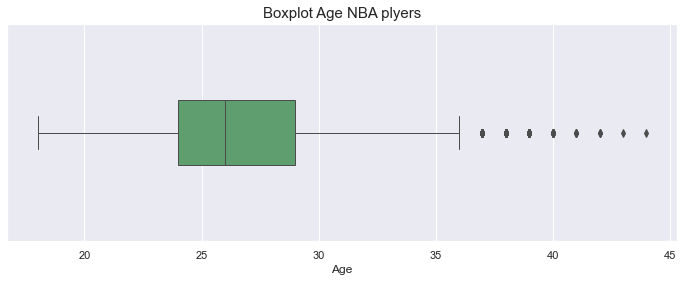

In [24]:
plt.figure(figsize=(12,4))
sns.set(style='darkgrid')
sns.boxplot(x=nba_df['Age'], color = 'g',  fliersize= 5, linewidth= 1, width = 0.3)
plt.title('Boxplot Age NBA plyers', fontsize = 15)
plt.show()


## Exercise 2

**select two attributes and calculate their correlation.**

In [25]:
# Checking 2PA/3PA - PTS Pearson correlations. Including NBA Seasons since 1979-80 season. 
nba_correlation = nba_df[(nba_df['Year'] >= 1980.0)]
nba_correlation.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,1980
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,1980
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,1980
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,1980
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0,1980


In [26]:
# Defining total_points variable for 2P-PTS Pearson correlation

total_points = nba_df[(nba_df['Year'] >= 1980.0)].groupby(['season']).sum()['PTS']
total_points.sample(5)

season
1991    249742.0
1999    140408.0
2002    241363.0
1983    222338.0
2013    256949.0
Name: PTS, dtype: float64

In [27]:
# 2P% mean by season. Series start in 1979-1980 NBA Season; until this time, FG and 2P shots were the same. Because of that, a '2PA' > 0 filter was added.
two_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0)].groupby(['Year']).mean()['2P%']
two_points_percentage.head()

Year
1980.0    0.462730
1981.0    0.457551
1982.0    0.475893
1983.0    0.466417
1984.0    0.476789
Name: 2P%, dtype: float64

In [28]:
# 3P% mean by season. Series starts in 1979-1980 NBA Season, when three point line was introduced to the game. Because of that, a 3PA > 0 filter was added. 
three_points_percentage = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0)].groupby(['Year']).mean()['3P%']
three_points_percentage.head()

Year
1980.0    0.198000
1981.0    0.153069
1982.0    0.171106
1983.0    0.138080
1984.0    0.176390
Name: 3P%, dtype: float64

In [29]:
# FGA by season
field_goals_a = nba_df.groupby(['Year']).sum()['FGA']
field_goals_a.head()

Year
1950.0    108515.0
1951.0     65262.0
1952.0     56232.0
1953.0     60467.0
1954.0     52444.0
Name: FGA, dtype: float64

In [30]:
# 2PA by season. Since 1979-1980 NBA Season, players with at least one 2P shot attempted
two_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0.0)].groupby(["Year"]).sum()['2PA']
two_points_a.head()

Year
1980.0    176190.0
1981.0    172754.0
1982.0    175326.0
1983.0    179734.0
1984.0    165331.0
Name: 2PA, dtype: float64

In [31]:
# 3PA by season. Since 1979-1980 NBA Season, players with at least one 3P shot attempted
three_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0.0)].groupby(["Year"]).sum()['3PA']
three_points_a.head()

Year
1980.0    5522.0
1981.0    4161.0
1982.0    4655.0
1983.0    4592.0
1984.0    4599.0
Name: 3PA, dtype: float64

In [32]:
# Testing correlation between 2PA and PTS
np.corrcoef(two_points_a,total_points)

array([[1.        , 0.53405537],
       [0.53405537, 1.        ]])

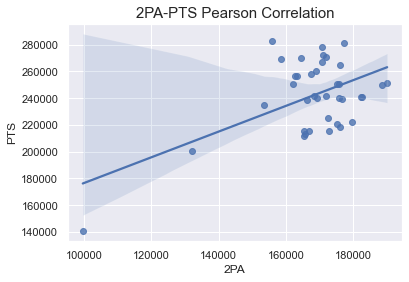

In [33]:
# Plotting 2PA-PTS correlation. Not much related
ax = sns.regplot(x= two_points_a, y= total_points)
ax.set_title('2PA-PTS Pearson Correlation')
ax.title.set_size(15);
#plt.savefig('2PA_PTS_correlation.png');

In [34]:
# Testing correlation between 2P% and PTS
np.corrcoef(two_points_percentage,total_points)

array([[1.       , 0.2080668],
       [0.2080668, 1.       ]])

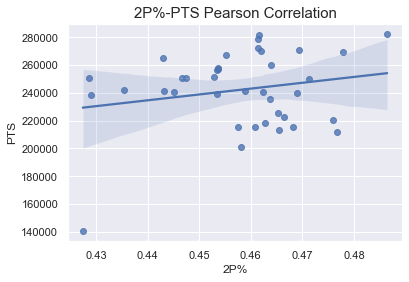

In [35]:
# Plotting 2P%-PTS correlation. They definitely are not related
ax = sns.regplot(x= two_points_percentage, y= total_points)
ax.set_title('2P%-PTS Pearson Correlation')
ax.title.set_size(15);

In [36]:
# Testing correlation between 3PA and PTS. It seems pretty significant
np.corrcoef(three_points_a,total_points)


array([[1.        , 0.71812845],
       [0.71812845, 1.        ]])

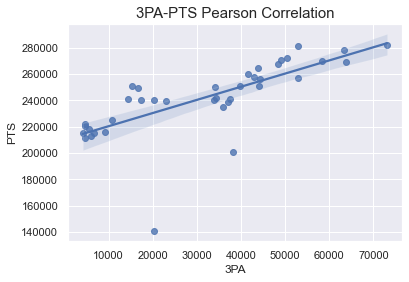

In [37]:
# Plotting 3PA-PTS correlation. Indeed, they are more close, but they have some outliers too.
ax = sns.regplot(x= three_points_a, y= total_points)
ax.set_title('3PA-PTS Pearson Correlation')
ax.title.set_size(15)
plt.savefig('3PA_PTS_correlation.png');

In [38]:
# Testing 2P%/3P% - PTS Pearson correlation for Point Guards
pg = nba_df[(nba_df.Pos.isin(['PG']))]
pg_2p_per = pg[(pg['Year'] >= 1980.0) & (pg['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
pg_3p_per = pg[(pg['Year'] >= 1980.0) & (pg['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(pg_2p_per,total_points))
print(np.corrcoef(pg_3p_per,total_points))

[[ 1.         -0.10630999]
 [-0.10630999  1.        ]]
[[1.         0.49697183]
 [0.49697183 1.        ]]


In [39]:
# Testing 2P%/3P% - PTS Pearson correlation for Shooting Guards
sg = nba_df[(nba_df.Pos.isin(['SG']))]
sg_2p_per = sg[(sg['Year'] >= 1980.0) & (sg['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
sg_3p_per = sg[(sg['Year'] >= 1980.0) & (sg['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(sg_2p_per,total_points))
print(np.corrcoef(sg_3p_per,total_points))


[[1.         0.03283994]
 [0.03283994 1.        ]]
[[1.         0.48271414]
 [0.48271414 1.        ]]


In [40]:
# Testing 2P%/3P% - PTS Pearson correlation for Small Forwards
sf = nba_df[(nba_df.Pos.isin(['SF']))]
sf_2p_per = sf[(sf['Year'] >= 1980.0) & (sf['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
sf_3p_per = sf[(sf['Year'] >= 1980.0) & (sf['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(sf_2p_per,total_points))
print(np.corrcoef(sf_3p_per,total_points))

[[1.         0.16023397]
 [0.16023397 1.        ]]
[[1.         0.58851921]
 [0.58851921 1.        ]]


In [41]:
# Testing 2P%/3P% - PTS Pearson correlation for Power Forwards
pf = nba_df[(nba_df.Pos.isin(['PF']))]
pf_2p_per = pf[(pf['Year'] >= 1980.0) & (pf['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
pf_3p_per = pf[(pf['Year'] >= 1980.0) & (pf['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(pf_2p_per,total_points))
print(np.corrcoef(pf_3p_per,total_points))

[[1.         0.15699879]
 [0.15699879 1.        ]]
[[1.        0.6317602]
 [0.6317602 1.       ]]


In [42]:
# Testing 2P%/3P% - PTS Pearson correlation for Centers
c = nba_df[(nba_df.Pos.isin(['C']))]
c_2p_per = c[(c['Year'] >= 1980.0) & (c['2PA'] > 0.0)].groupby(['Year']).mean()['2P%']
c_3p_per = c[(c['Year'] >= 1980.0) & (c['3PA'] > 0.0)].groupby(['Year']).mean()['3P%']

print(np.corrcoef(c_2p_per,total_points))
print(np.corrcoef(c_3p_per,total_points))

[[1.         0.47033177]
 [0.47033177 1.        ]]
[[1.        0.3717045]
 [0.3717045 1.       ]]


We yet try just the Pearson correlations. let's try other correlations 
. Pearson: The Pearson product-moment correlation is one of the most commonly used correlations in statistics. It’s a measure of the strength and the direction of a linear relationship between two variables/

. Spearman: relies on nearly all the same assumptions as the pearson correlation, but it doesn’t rely on normality, and your data can be ordinal as well. Thus, it’s a non-parametric test/

. Kendall: The Kendall correlation is similar to the spearman correlation in that it is non-parametric. It can be used with ordinal or continuous data. It is a statistic of dependence between two variables.

Let's use those different ones between the same variables to be able to compare!!

In [43]:
#pg.corr(nba_df['BLK'], nba_df['PTS'])
#display(pg.corr(nba_df['Age'], nba_df['PTS'], method='spearman'))
#display(pg.corr(nba_df['Age'], nba_df['PTS'], method='kendall'))

## Exercici 3
 calculates the correlation of all the attributes with each other and represents them in a matrix with different colors of intensity.

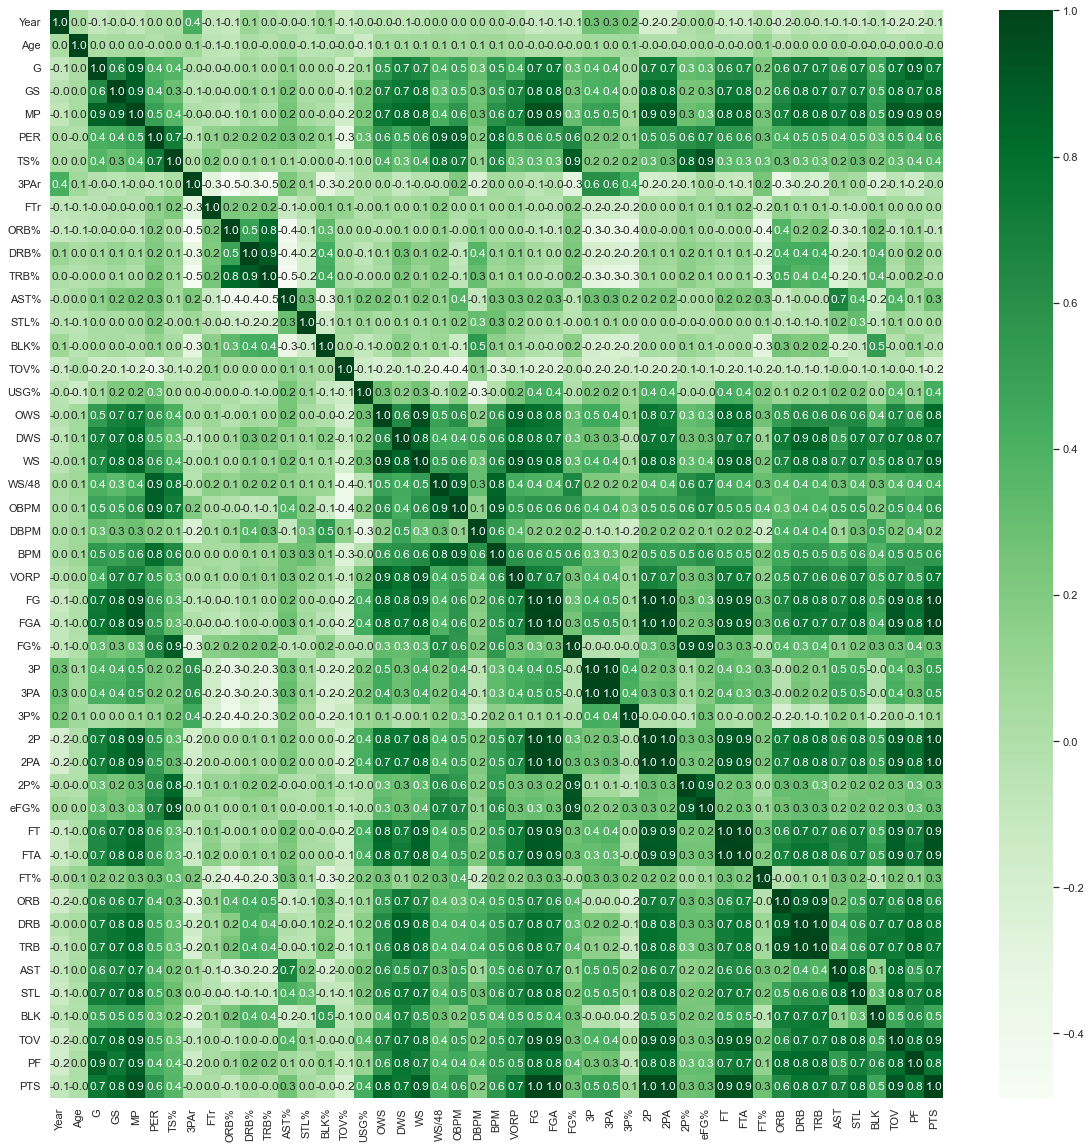

In [44]:
# Matrix correlation, looking for correlations between variables
nba_correlation = nba_correlation.corr()

ax = plt.figure(figsize=(20,20))
sns.heatmap(nba_correlation, cbar=True, fmt='.1f', annot=True, cmap='Greens');

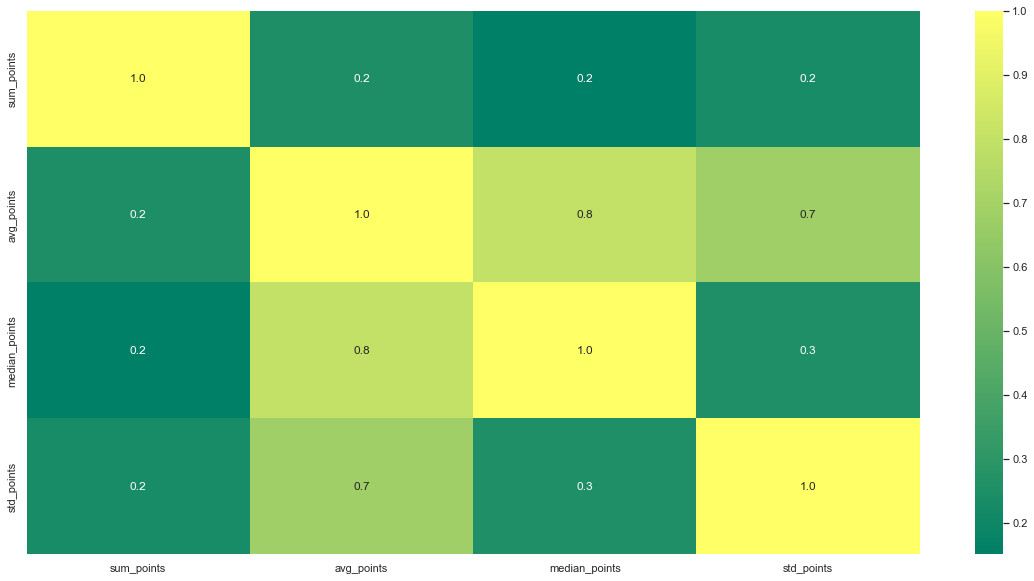

In [45]:
# Matrix correlation, looking for correlations between variables
nba_team_correlation = nba_team.corr()

ax = plt.figure(figsize=(20,10))
sns.heatmap(nba_team_correlation, cbar=True, fmt='.1f', annot=True, cmap='summer');

## Exercici 4

Select an attribute and calculate the geometric mean and harmonic mean.

In [46]:
nba_team

sum_points  avg_points  median_points  std_points
Tm  season                                                   
AND 1950        5589.0  349.312500          281.0  313.246595
ATL 1969        9123.0  701.769231          686.0  596.966241
    1970        9646.0  742.000000          501.0  666.420538
    1971        9348.0  779.000000          628.5  708.894273
    1972        8982.0  528.352941          176.0  586.833658
...                ...         ...            ...         ...
WSB 1995        8242.0  515.125000          503.0  414.891130
    1996        8408.0  400.380952          188.0  479.297348
    1997        8147.0  543.133333          374.0  568.176892
WSC 1950        5201.0  371.500000          373.0  243.136160
    1951        1625.0  125.000000           67.0  121.562741

[1491 rows x 4 columns]

In [47]:
# for this one we will come back to the nba_team data frame 

mean_team = round(nba_team['sum_points'].mean(), 2)
std_team = round(nba_team['sum_points'].std(), 2)
median_team = nba_team['sum_points'].median()
mode_team = nba_team['sum_points'].mode()[0]

hmean_team = scipy.stats.hmean(nba_team.loc[:,'sum_points'])
gmean_team = scipy.stats.gmean(nba_team.loc[:,'sum_points'])
circmean_team = scipy.stats.circmean(nba_team.loc[:,'sum_points'])


print('For attribute  Points: ' + '\n' + 'mean team: '+ str(mean_team) 
                                + '\n' + 'std deviation: ' + str(std_team)
                                + '\n' + 'median points team: '+ str(median_team)
                                + '\n'+ 'mode_team: '+ str(mode_team)
                                + '\n'+ 'harmonic mean: '+str(hmean_team)
                                +'\n'+ 'geometric mean: '+str(gmean_team))


For attribute  Points: 
mean team: 8424.62
std deviation: 2231.68
median points team: 8380.0
mode_team: 8556.0
harmonic mean: 7853.489312715236
geometric mean: 8201.563741053786


# Sprint 7 : Hypothesis Testing

## Exercise 1

In [48]:
import scikit_posthocs as sp
import numpy as np
from scipy import stats
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

### One Sample Significance Tests

1. Specify the Null Hypothesis 𝐻0 .
2. Specify the Alternative Hypothesis 𝐻𝛼 
3. Set the Significant Level 𝛼.
4. Calculate the test statistic and
   corresponding p-value.
5. Interpret the results to accept or reject
   the null hypothesis.


In [51]:
df_hypothesis = pd.read_csv('Datasets/players_stats.csv')
df_hypothesis.head()


,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2000,15,57,26.3000,...,29.0000,us,"October 7, 1986",University of Connecticut,5,185.0000,PG,PHO,81.4500,23.7984
1,Aaron Brooks,82,1885,954,344,817,42.1000,121,313,38.7000,...,30.0000,us,"January 14, 1985",University of Oregon,6,180.0000,PG,CHI,72.4500,22.3611
2,Aaron Gordon,47,797,243,93,208,44.7000,13,48,27.1000,...,20.0000,us,"September 16, 1995",University of Arizona,R,202.5000,PF,ORL,99.0000,24.1427
3,Adreian Payne,32,740,213,91,220,41.4000,1,9,11.1000,...,24.0000,us,"February 19, 1991",Michigan State University,R,205.0000,PF,ATL,106.6500,25.3778
4,Al Horford,76,2318,1156,519,965,53.8000,11,36,30.6000,...,29.0000,do,"June 3, 1986",University of Florida,7,205.0000,C,ATL,110.2500,26.2344


In [52]:
df_hypothesis.shape

(490, 34)

> **Step 1 : the Null Hypothesis 𝐻0 : The average height of an NBA player is 210 cm.**

> **Step 2 : Alternate Hypothesis: The average height of an NBA player is not 210 cm.**

> **Step 3 : Significance Level,  is at 0.05. Assuming Null Hypothesis to be true.**

> **Step 4 :Calculate the test statistic and corresponding p-value.**

In [53]:
# define the H0

h0_mean = 210

In [54]:
h1_mean = df_hypothesis['Height'].mean()
h1_mean

197.44075829383885

In [55]:
sigma = df_hypothesis['Height'].std()/np.sqrt(len(df_hypothesis))
sigma

0.3948442447237618

In [56]:
z= (h1_mean - h0_mean)/sigma
z

-31.808091099182047

In [57]:
p_val = (1- stats.norm.cdf(abs(z))) * 2
p_val

0.0

The p value is so small that Python has effectively rounded it to zero.

> **Step 5: Comparison**

     The p value obtained is extremely strong evidence to suggest that it is much lower than our significance level We can disregard the null hypothesis and accept the alternate hypothesis (since it is the negation of the null hypothesis).




> **Step6 : Decesion**

     The average height of NBA players is not 210 cm

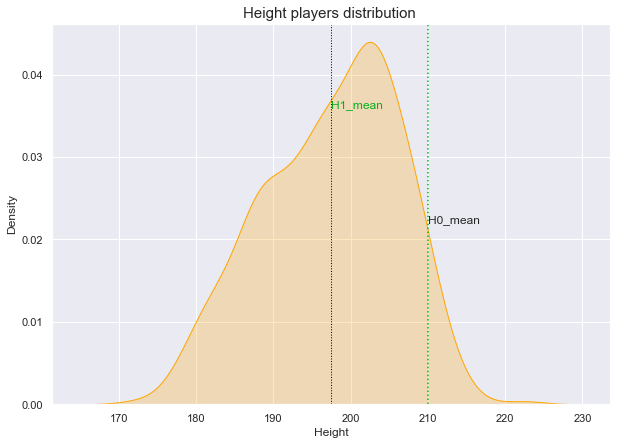

In [58]:
plt.figure(figsize= (10,7))

sns.kdeplot(df_hypothesis['Height'], label= 'Height', color= 'orange', fill = True)
plt.axvline(x= h1_mean, linewidth = 1, color= 'black', ls= 'dotted')
plt.axvline(x= h0_mean, color = '#08b01f', ls = 'dotted')
plt.text(x=210, y=0.022, s= "H0_mean")
plt.text(x=197.44, y = 0.036, s= 'H1_mean', color= '#08b01f')
plt.title('Height players distribution ', size = 15)
plt.show()

## Exercise 2

### Two Sample Significance Tests

Now we will suppose that the hight players get bigger after installing the 3 points rules 

In [59]:
# create 2 data frames, on with the plyers and their statistics before 1980 and after 1980
abv2m3p  = df_hypothesis[df_hypothesis['Height']>= 200]['3PM']
                                  
under2m3p = df_hypothesis[df_hypothesis['Height'] < 200]['3PM']
                            

In [60]:
abv2m3p_mean = abv2m3p.mean()
abv2m3p_std = abv2m3p.std()

abv2m3p_mean , abv2m3p_std

(25.92718446601942, 39.6010536794402)

In [61]:
under2m3p_mean = under2m3p.mean()
under2m3p_std = under2m3p.std()

under2m3p_mean, under2m3p_std


(55.958333333333336, 53.41842835924783)

>**Null Hypothesis: The true mean for the 3 points scoring  for taller and lower then 2m are the same.**

>**Alternate Hypothesis: The true mean  for 3 points scoring for taller and lower then 2m  are not the same**

In [62]:
h0_2mean = 0

mean_diff = abv2m3p_mean -  under2m3p_mean


sigma_diff = np.sqrt((abv2m3p_mean**2)/len(abv2m3p) +
                     (under2m3p_std**2)/len(under2m3p))

mean_diff , sigma_diff

(-30.031148867313917, 4.058814920016555)

In [65]:
deg = (((abv2m3p_std)**2/len(abv2m3p))+((under2m3p_std**2)/len(under2m3p)**2))/((((abv2m3p_std**2)/ len(abv2m3p**2)) / len(abv2m3p)-1) + (((under2m3p_std**2)/ len(under2m3p))**2)/ (len(under2m3p) - 1)
)
deg

-50.71981904239158

In [66]:
(((abv2m3p_std**2)/ len(abv2m3p**2)) / len(abv2m3p)-1) + (((under2m3p_std**2)/ len(under2m3p))**2)/ (len(under2m3p) - 1)


-0.15130166978868154

In [67]:
z = (mean_diff - h0_mean) / sigma_diff
z

-59.13823458260443

In [68]:
p = (1-stats.t.cdf(z, deg))*2
p

nan

> **Step 5: Comparison**

     The p value obtained is extremely strong evidence to suggest that it is much lower than our significance level We can disregard the null hypothesis and accept the alternate hypothesis (since it is the negation of the null hypothesis).


### **Now that we know the maths behind the tests , lets do it with statsmodels.api**

In [69]:
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower

import statsmodels.formula.api as smf

In [70]:
class Test():
    def __init__(self, sample1, sample2, alpha=0.05):
        self.sample1 = sample1
        self.sample2 = sample2
        self.len1 = len(sample1)
        self.len2 = len(sample2)
        self.alpha = float(alpha)
        self.t_stat = None
        self.t_crit = None
        self.power = None
        self.df = None
        self.p_value = None
        self.mean_diff = None
        self.cohen_d = None
        self.test = None
        self.default_plot_infos = {"title":"Distribution of sample number 1 and sample number 2",
             "label1":"Sample 1 Distribution",
             "label2":"Sample 2 Distribution",
             "xlabel":"Samples values",
             "ylabel":"% Count",
             "bins":25,
             "figsize":[12,8]}
    
    def cohens_d(self):
        diff = np.array(self.sample1).mean() - np.array(self.sample2).mean()
        var1 = np.array(self.sample1).var()
        var2 = np.array(self.sample2).var()
        # Calculate the pooled threshold as shown earlier
        pooled_var = (self.len1 * var1 + self.len2 * var2) / (self.len1 + self.len2)
        # Calculate Cohen's d statistic
        d = diff / np.sqrt(pooled_var)
        self.cohen_d = abs(d)

    def welch_df(self):
        """ Calculate the effective degrees of freedom for two samples. """
        s1 = np.array(self.sample1).var(ddof=1) 
        s2 = np.array(self.sample2).var(ddof=1)
        n1 = np.array(self.sample1).size
        n2 = np.array(self.sample2).size
        numerator = (s1/n1 + s2/n2)**2
        denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
        self.df = numerator/denominator
    
    def welch(self):
        self.test = "welch"
        self.t_stat, self.p_value = stats.ttest_ind(self.sample1, self.sample2, equal_var=False)
        self.t_crit = stats.t.ppf(1-(self.alpha/2), (self.len1+self.len2-2))
        mean_sample1 = round((sum(self.sample1)/self.len1),3)
        mean_sample2 = round((sum(self.sample2)/self.len2),3)
        self.mean_diff = round(abs(mean_sample1 - mean_sample2),3)
        self.cohens_d()
        self.welch_df()
        nobs = (self.len1 + self.len2)/2
        power = TTestIndPower()
        self.power = power.solve_power(effect_size=self.cohen_d, 
                                                  nobs1=nobs, 
                                                  alpha=self.alpha, 
                                                  ratio=(self.len1/self.len2),
                                                  alternative='two-sided')
    def two_sample_ttest(self):
        self.test = "two_sample_ttest"
        self.t_stat, self.p_value = stats.ttest_ind(self.sample1, self.sample2)
        self.t_crit = stats.t.ppf(1-(self.alpha/2), (self.len1+self.len2-2))
        mean_sample1 = round((sum(self.sample1)/self.len1),3)
        mean_sample2 = round((sum(self.sample2)/self.len2),3)
        self.mean_diff = round(abs(mean_sample1 - mean_sample2),3)
        self.cohens_d()
        nobs = (self.len1 + self.len2)/2
        power = TTestIndPower()
        self.power = power.solve_power(effect_size=self.cohen_d, 
                                                  nobs1=nobs, 
                                                  alpha=self.alpha, 
                                                  ratio=(self.len1/self.len2),
                                                  alternative='two-sided')
    def print_welch(self):
        if not self.p_value:
            print("You need to run the test using the method \"test\" before printing the results using")
        else:
            print('Welch\'s T-test')
            print("---------------------------------------------------------------")
            print(f"Obs Number: Sample_1 = {self.len1}   Sample_2 = {self.len2}")
            print("---------------------------------------------------------------")
            print(f'Control Group Avg: {round((np.array(self.sample1).mean()),2)}  \n Standard Deviation of the Control Group: {round((np.array(self.sample1).std()),2)}')
            print(f'Control Group Avg: {round((np.array(self.sample2).mean()),2)}  \n Standard Deviation of the Experimental Group: {round((np.array(self.sample2).std()),2)}')
            print()
            print(f"Mean Differance: {self.mean_diff}")
            print("---------------------------------------------------------------")
            print(f'Degrees of Freedom: {round(self.df)}')
            print("---------------------------------------------------------------")
            print(f't-stat: {self.t_stat} \nt-crit: {self.t_crit}')
            print("---------------------------------------------------------------")
            print(f'P-value: {self.p_value} \nAlpha(2-Tail): {self.alpha/2}')
            print("---------------------------------------------------------------")
            print(f'Cohen\'s d: {self.cohen_d}')
            print("As it is greater then 0.5 this would indicate there is between a medium to large difference in mean between both samples")
            print()
            print("---------------------------------------------------------------")
            if (abs(self.t_stat) > self.t_crit) and (self.p_value < (self.alpha/2)):
                print("|t_stat| > t_crit:",(abs(self.t_stat) > self.t_crit))
                print("P_value > Alpha(2-Tail):", (self.p_value < self.alpha))
                print("---------------------------------------------------------------")
                print("-RESULTS-")
                print("\nReject Null Hypothesis! The results shows that the samples are statistically significant.")
            else:
                print("|t_stat| > t_crit:",(abs(self.t_stat) > self.t_crit))
                print("P_value < Alpha(2-Tail):", (self.p_value < (self.alpha/2)))
                print("\nDo NOT Reject Null Hypotheses. The results are NOT statistically significant.")
            print("---------------------------------------------------------------")
    
    def print_two_sample_ttest(self):
        if not self.p_value:
            print("You need to run the test using the method \"test\" before printing the results using")
        else:
            print("Two Tail T-test:")
            print("---------------------------------------------------------------")
            print(f"Obs Number: Sample_1 = {self.len1}   Sample_2 = {self.len2}")
            print(f"Sample Means: Control Group Avg = {round((np.array(self.sample1).mean()),2)}   Experimental Group Avg = {round((np.array(self.sample2).mean()),2)}")
            print(f"Mean Differance: {self.mean_diff}")
            print("---------------------------------------------------------------")
            print(f"t-crit: {self.t_crit} \nt-stat: {self.t_stat} \nP-value: {self.p_value} \nAlpha(2-Tail): {self.alpha/2}")
            print("---------------------------------------------------------------")
            print(f'Cohen\'s d: {self.cohen_d}')
            print("---------------------------------------------------------------")
            if (abs(self.t_stat) > self.t_crit) and (self.p_value < (self.alpha/2)):
                print("|t_stat| > t_crit:",(abs(self.t_stat) > self.t_crit))
                print("P_value > Alpha(2-Tail):", (self.p_value < self.alpha))
                print("---------------------------------------------------------------")
                print("-RESULTS-")
                print("\nReject Null Hypothesis! The results shows that the samples are statistically significant.")
            else:
                print("|t_stat| > t_crit:",(abs(self.t_stat) > self.t_crit))
                print("P_value < Alpha(2-Tail):", (self.p_value < (self.alpha/2)))

                print("\nDo NOT Reject Null Hypotheses. The results are NOT statistically significant.")
            print("---------------------------------------------------------------")
    
    def print_results(self):
        if self.test == "welch":
            self.print_welch()
        elif self.test == "two_sample_ttest":
            self.print_two_sample_ttest()
        else:
            print("You didn't run any tests")

    def plot(self, plot_infos=None):
        if not plot_infos:
            plot_infos = self.default_plot_infos
        plt.figure(figsize=(plot_infos["figsize"][0],plot_infos["figsize"][1]))
        plt.title(plot_infos["title"])
        sns.histplot(self.sample1, label=plot_infos["label1"], bins=plot_infos["bins"],color='r' )
        sns.histplot(self.sample2, label=plot_infos["label2"], bins=plot_infos["bins"], color='b' )
        plt.axvline(np.array(self.sample1).mean(), color='r',alpha = 0.7, linestyle='--')
        plt.axvline(np.array(self.sample2).mean(), color='b',alpha = 0.7, linestyle='--')
        plt.ylabel(plot_infos["ylabel"])
        plt.xlabel(plot_infos["xlabel"])
        plt.legend()
        plt.show()

#### Hypothesis 1

In [71]:
# We are taking these specific columns, we will use them in order to test our first Hypothesis
game_hometeam_df = games_df[['GAME_ID','SEASON','GAME_DATE_EST', 'HOME_TEAM_ID', 'HOME_TEAM_WINS']]
game_hometeam_df.head()

,GAME_ID,SEASON,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS
0,41300405,2013,2014-06-15,1610612759,1
1,41300404,2013,2014-06-12,1610612748,0
2,41300403,2013,2014-06-10,1610612748,0
3,41300402,2013,2014-06-08,1610612759,0
4,41300401,2013,2014-06-05,1610612759,1


In [72]:
#join both game_hometeam_df and game_player_detail
df2 = pd.merge(game_player_detail, game_hometeam_df, on='GAME_ID')
df2.head()

,GAME_ID,TEAM_ID,TEAM_CITY,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,SEASON,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS
0,40800405,1610612747,Los Angeles,LAL,41:29,2772,Trevor Ariza,26.2500,2008,2009-06-14,1610612753,0
1,40800405,1610612747,Los Angeles,LAL,42:09,2200,Pau Gasol,44.7500,2008,2009-06-14,1610612753,0
2,40800405,1610612747,Los Angeles,LAL,16:54,101115,Andrew Bynum,13.7500,2008,2009-06-14,1610612753,0
3,40800405,1610612747,Los Angeles,LAL,43:18,977,Kobe Bryant,57.5000,2008,2009-06-14,1610612753,0
4,40800405,1610612747,Los Angeles,LAL,31:59,965,Derek Fisher,21.0000,2008,2009-06-14,1610612753,0


In [73]:
#just to make values in minutes to a float instead of a string
def minutes(value):
    list_nb = value.split(':')
    if len(list_nb) == 1:
        return float(list_nb[0])
    else:
        return round(float(list_nb[0]) + (float(list_nb[1])/60),2)
df2['MIN'] = df2['MIN'].apply(minutes)

In [74]:
df2.MIN.dtype

dtype('float64')

In [75]:
#creating a new column to see if the TEAM_ID == HOME_TEAM_ID to ensure they did play at home.
df2.loc[(df2['TEAM_ID'] == df2['HOME_TEAM_ID']), 'PLAYED_HOME'] = 1
df2.loc[(df2['TEAM_ID'] != df2['HOME_TEAM_ID']), 'PLAYED_HOME'] = 0

# using the previously made column to count win
df2.loc[(df2['PLAYED_HOME'] ==1), 'WIN'] = 1
df2.loc[(df2['PLAYED_HOME'] !=1), 'WIN'] = 0
df_MIN_ten = df2.loc[(df2['MIN'] > 10)]
df_MIN_ten.head()

,GAME_ID,TEAM_ID,TEAM_CITY,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,SEASON,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,PLAYED_HOME,WIN
0,40800405,1610612747,Los Angeles,LAL,41.4800,2772,Trevor Ariza,26.2500,2008,2009-06-14,1610612753,0,0.0000,0.0000
1,40800405,1610612747,Los Angeles,LAL,42.1500,2200,Pau Gasol,44.7500,2008,2009-06-14,1610612753,0,0.0000,0.0000
2,40800405,1610612747,Los Angeles,LAL,16.9000,101115,Andrew Bynum,13.7500,2008,2009-06-14,1610612753,0,0.0000,0.0000
3,40800405,1610612747,Los Angeles,LAL,43.3000,977,Kobe Bryant,57.5000,2008,2009-06-14,1610612753,0,0.0000,0.0000
4,40800405,1610612747,Los Angeles,LAL,31.9800,965,Derek Fisher,21.0000,2008,2009-06-14,1610612753,0,0.0000,0.0000


In [76]:
# grouping players(who have multiple games) by the average of all of their scores
df_top_player_avg = df2.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df_top_player_avg.sort_values(ascending=False)
df_top_player_avg.head()
df_top_player_avg.count()

#making a df with player scores and number of games they have played
df_top_player_count = df2.groupby('PLAYER_NAME')['DF_SCORE'].count()
df_top_player_count.sort_values(ascending=False)
frame = {'DF_AVG_SCORE': df_top_player_avg, 'GAMES_PLAYED': df_top_player_count}
df_top_player_stat = pd.DataFrame(frame)
df_top_player_stat.head(20)

#sorting the df to only show players who have avg score >10 and more games played then 250
df_top_player_stat = df_top_player_stat[(df_top_player_stat['DF_AVG_SCORE'] > 10) &
                                        (df_top_player_stat['GAMES_PLAYED'] > 250)]
list_players = df_top_player_stat.index
len(list_players) # 616 players that we want to use for our analysis
#list_players

616

In [77]:
df3 = df2.loc[(df2['PLAYER_NAME'].isin(list_players))]
df3_home = df3.loc[(df3['WIN'] == 1)]
df3_away = df3.loc[(df3['WIN'] == 0)]
df3_home.head()
df3_away.head()

,GAME_ID,TEAM_ID,TEAM_CITY,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,DF_SCORE,SEASON,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,PLAYED_HOME,WIN
0,40800405,1610612747,Los Angeles,LAL,41.4800,2772,Trevor Ariza,26.2500,2008,2009-06-14,1610612753,0,0.0000,0.0000
1,40800405,1610612747,Los Angeles,LAL,42.1500,2200,Pau Gasol,44.7500,2008,2009-06-14,1610612753,0,0.0000,0.0000
2,40800405,1610612747,Los Angeles,LAL,16.9000,101115,Andrew Bynum,13.7500,2008,2009-06-14,1610612753,0,0.0000,0.0000
3,40800405,1610612747,Los Angeles,LAL,43.3000,977,Kobe Bryant,57.5000,2008,2009-06-14,1610612753,0,0.0000,0.0000
4,40800405,1610612747,Los Angeles,LAL,31.9800,965,Derek Fisher,21.0000,2008,2009-06-14,1610612753,0,0.0000,0.0000


In [78]:
df3_home_avg = df3_home.groupby('PLAYER_NAME')['DF_SCORE'].mean()
df3_away_avg = df3_away.groupby('PLAYER_NAME')['DF_SCORE'].mean()
frame = {'HOME_AVG': df3_home_avg, 'AWAY_AVG': df3_away_avg}
df3_home_away_stat = pd.DataFrame(frame)
df3_home_away_stat.head()
df3_home_away_stat['AVG_DIFFERENCE'] = ((df3_home_away_stat.HOME_AVG - df3_home_away_stat.AWAY_AVG))
df3_home_away_stat.head()
#df3_home_away_stat.AVG_DIFFERENCE.mean()

,HOME_AVG,AWAY_AVG,AVG_DIFFERENCE
PLAYER_NAME,,,
AJ Price,12.3977,11.8224,0.5753
Aaron Brooks,17.0177,17.4270,-0.4093
Aaron Gordon,26.4732,25.2865,1.1867
Adonal Foyle,12.8289,10.5682,2.2608
Al Harrington,26.9878,25.9962,0.9915


<AxesSubplot:title={'center':'Away Avg'}, xlabel='DF_SCORE', ylabel='%Count'>

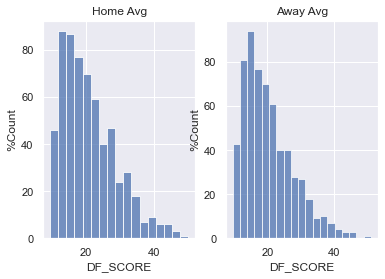

In [79]:
plt.figure()
ax = plt.subplot(121)
plt.title('Home Avg')
plt.ylabel('%Count')
sns.histplot(df3_home_avg)

ax = plt.subplot(122)
plt.title('Away Avg')
plt.ylabel('%Count')
sns.histplot(df3_away_avg)

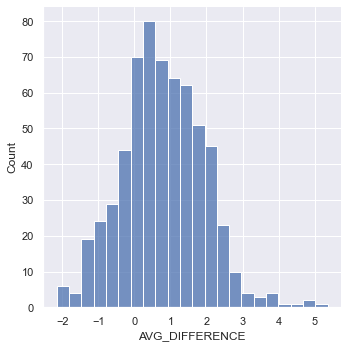

In [82]:
# average diff in players scores Home vs Away
sns.displot(df3_home_away_stat.AVG_DIFFERENCE)

#### Hypothesis 1 :

 

> **Step 1 : the Null Hypothesis 𝐻0 : There is no significant difference in player performance when playing Home vs Away**

 > **Step 2 : Alternate Hypothesis: There is a significant difference in player performance when playing Home vs Away**

> **Step 3 : Significance Level,  is at 0.05. Assuming Null Hypothesis to be true.**

Two Sample Student T-test

as it is equal sample size and normally distributed we applied a two sample student t-test

In [83]:
# lets take Home_avg as our Control group and Away_avg as our experimental group
control = df3_home_avg
experimental = df3_away_avg

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 616   Sample_2 = 616
Sample Means: Control Group Avg = 21.13   Experimental Group Avg = 20.34
Mean Differance: 0.781
---------------------------------------------------------------
t-crit: 1.9618945273326114 
t-stat: 1.7949923423579175 
P-value: 0.0729003554467178 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
Cohen's d: 0.10236230106868754
---------------------------------------------------------------
|t_stat| > t_crit: False
P_value < Alpha(2-Tail): False

Do NOT Reject Null Hypotheses. The results are NOT statistically significant.
---------------------------------------------------------------


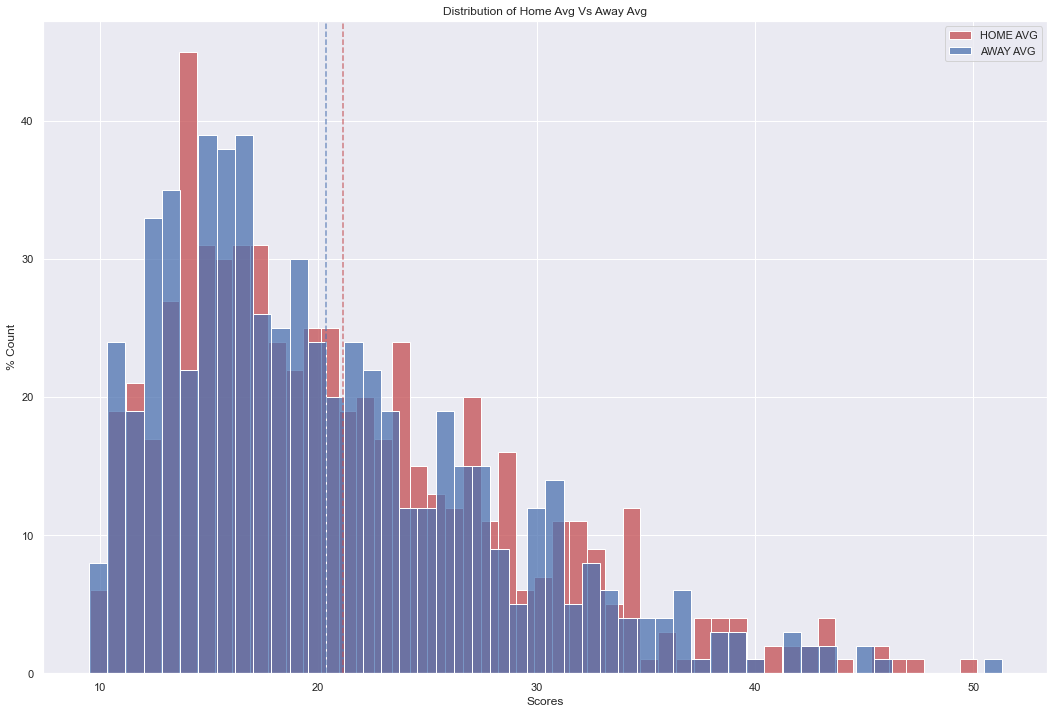

In [84]:
test = Test(control, experimental, 0.05)
test.two_sample_ttest()
test.print_results()
plot_infos = {"title":"Distribution of Home Avg Vs Away Avg",
             "label1":"HOME AVG",
             "label2":"AWAY AVG",
             "xlabel":"Scores",
             "ylabel":"% Count",
             "bins":50,
             "figsize":[18,12]}
test.plot(plot_infos)

From this we can see that the effect sizes is very low at around 0.1, showing there is a very small difference between both samples. We can also see that the P-Value is greater then our Alpha and our T-Stat is less then our critical value. this all leads us to believe that there is no Significant effect on player performance whether they play at home or away.

In [85]:
df2["PLAYER_NAME"] 

0            Trevor Ariza
1               Pau Gasol
2            Andrew Bynum
3             Kobe Bryant
4            Derek Fisher
               ...       
471823    Jordan Hamilton
471824     Kenneth Faried
471825       Kosta Koufos
471826     Timofey Mozgov
471827          Ty Lawson
Name: PLAYER_NAME, Length: 471828, dtype: object

In [86]:
#taking games where he played Home and Away for longer then 10min

df_h_gazol = df2[(df2["PLAYER_NAME"] == "Pau Gasol") & (df2["WIN"] == 1) & (df2["MIN"] > 10)]
df_h_gazol = df_h_gazol["DF_SCORE"]
df_a_gazol = df2[(df2["PLAYER_NAME"] == "Pau Gasol") & (df2["WIN"] == 0) & (df2["MIN"] > 10)]
df_a_gazol = df_a_gazol["DF_SCORE"]
#df_a_gazol

Welch's T-test
---------------------------------------------------------------
Obs Number: Sample_1 = 655   Sample_2 = 595
---------------------------------------------------------------
Control Group Avg: 36.68  
 Standard Deviation of the Control Group: 11.92
Control Group Avg: 35.47  
 Standard Deviation of the Experimental Group: 11.27

Mean Differance: 1.209
---------------------------------------------------------------
Degrees of Freedom: 1246
---------------------------------------------------------------
t-stat: 1.840334298173037 
t-crit: 1.9618666564067104
---------------------------------------------------------------
P-value: 0.06595687565418575 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
Cohen's d: 0.10402990861269519
As it is greater then 0.5 this would indicate there is between a medium to large difference in mean between both samples

---------------------------------------------------------------
|t_stat| > t_crit: False
P_valu

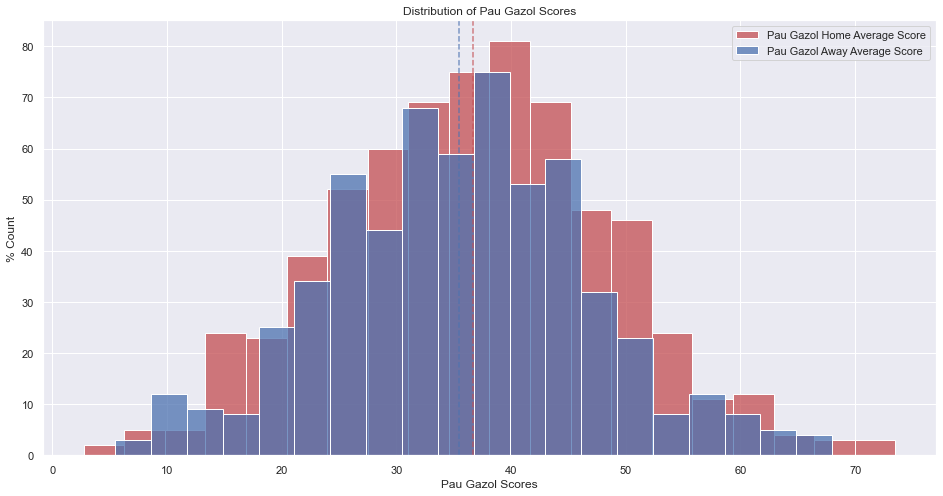

In [87]:
test = Test(df_h_gazol, df_a_gazol, 0.05)
test.welch()
test.print_results()
plot_infos = {"title":"Distribution of Pau Gazol Scores",
             "label1":"Pau Gazol Home Average Score",
             "label2":"Pau Gazol Away Average Score",
             "xlabel":"Pau Gazol Scores",
             "ylabel":"% Count",
             "bins":20,
             "figsize":[16,8]}
test.plot(plot_infos)

Welch's T-test
---------------------------------------------------------------
Obs Number: Sample_1 = 388   Sample_2 = 370
---------------------------------------------------------------
Control Group Avg: 32.72  
 Standard Deviation of the Control Group: 14.32
Control Group Avg: 27.42  
 Standard Deviation of the Experimental Group: 13.23

Mean Differance: 5.304
---------------------------------------------------------------
Degrees of Freedom: 755
---------------------------------------------------------------
t-stat: 5.294010552914921 
t-crit: 1.9631068538120788
---------------------------------------------------------------
P-value: 1.5702179296609873e-07 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
Cohen's d: 0.3844703721557485
As it is greater then 0.5 this would indicate there is between a medium to large difference in mean between both samples

---------------------------------------------------------------
|t_stat| > t_crit: True
P_valu

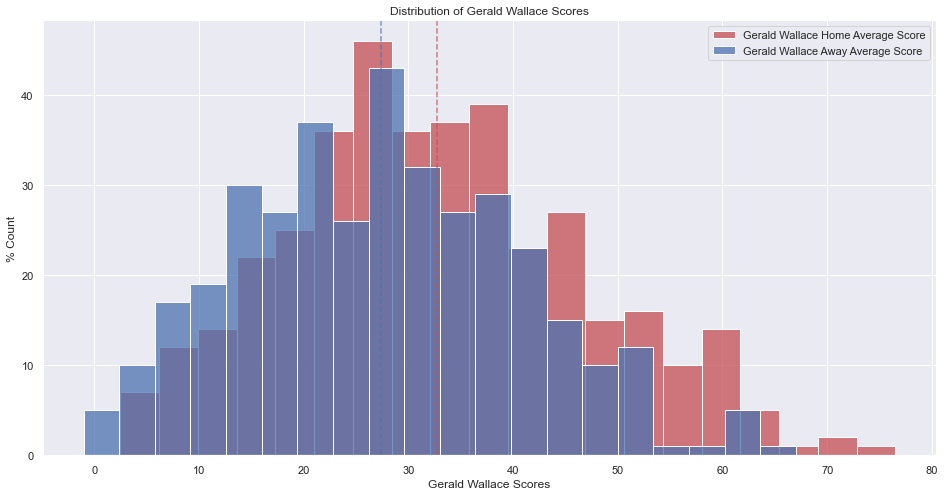

In [88]:
#taking games where he played Home and Away for longer then 10min
df_h_gerald = df2[(df2["PLAYER_NAME"] == "Gerald Wallace") & (df2["WIN"] == 1) & (df2["MIN"] > 10)]
df_h_gerald = df_h_gerald["DF_SCORE"]
df_a_gerald = df2[(df2["PLAYER_NAME"] == "Gerald Wallace") & (df2["WIN"] == 0) & (df2["MIN"] > 10)]
df_a_gerald = df_a_gerald["DF_SCORE"]


test = Test(df_h_gerald, df_a_gerald, 0.05)
test.welch()
test.print_results()
plot_infos = {"title":"Distribution of Gerald Wallace Scores",
             "label1":"Gerald Wallace Home Average Score",
             "label2":"Gerald Wallace Away Average Score",
             "xlabel":"Gerald Wallace Scores",
             "ylabel":"% Count",
             "bins":20,
             "figsize":[16,8]}
test.plot(plot_infos)

> **Step6 : Decesion**

We can see although we fail to reject the Null Hypothesis when we take into consideration all players, when it comes to certain higher calibre players there is a significant difference in performance Home Vs Away.

#### Hypothesis2:

> **the Null Hypothesis 𝐻0 :: There is no significant difference in ease for teams to make the Playoffs in the East Vs the West**

>  **Alternate Hypothesis: It is significantly easier for teams to make the Playoffs in the East Vs the West**

In [89]:
seasons_ids = list(ranking_df["SEASON_ID"].unique())
seasons_df = []
for season_id in seasons_ids:
    n = str(season_id)[0]
    if n == "1":
        continue
    df = ranking_df[ranking_df["SEASON_ID"] == season_id]
    df = df.drop_duplicates(subset="TEAM")
    df["SEASON_ID"][:] = str(season_id)[1:]
    df = df.reset_index()
    df = df[["SEASON_ID", "CONFERENCE", "TEAM", "G", "W", "L", "W_PCT"]]    
    seasons_df.append(df)
seasons_df[-6]

,SEASON_ID,CONFERENCE,TEAM,G,W,L,W_PCT
0,2019,West,L.A. Lakers,20,17,3,0.8500
1,2019,West,Denver,17,13,4,0.7650
2,2019,West,LA Clippers,21,15,6,0.7140
3,2019,West,Dallas,19,13,6,0.6840
4,2019,West,Houston,19,13,6,0.6840
5,2019,West,Utah,21,12,9,0.5710
6,2019,West,Minnesota,19,10,9,0.5260
7,2019,West,Phoenix,19,9,10,0.4740
8,2019,West,Oklahoma City,19,8,11,0.4210
9,2019,West,Sacramento,19,8,11,0.4210


In [90]:

#del seasons_df[12]

In [91]:
# create two lists with teams % win that made it in both West and East for each season(top 8 teams)
west_teams_qualifiying = []
east_teams_qualifiying = []
for season in seasons_df:
    west_qualifiying_min = round(float(season[7:8]['W_PCT'])*100,2)
    east_qualifiying_min = round(float(season[22:23]['W_PCT'])*100,2)
    west_teams_qualifiying.append(west_qualifiying_min)
    east_teams_qualifiying.append(east_qualifiying_min)

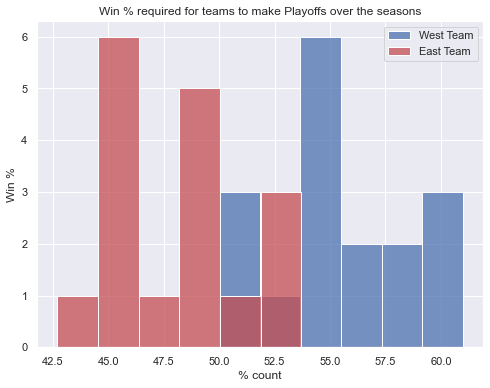

In [92]:
plt.figure(figsize=(8,6))
sns.histplot(west_teams_qualifiying, label='West Team', color = 'b')
sns.histplot(east_teams_qualifiying, label='East Team', color = 'r')
plt.xlabel('% count')
plt.ylabel('Win %')
plt.legend()
plt.title('Win % required for teams to make Playoffs over the seasons')
plt.show()

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 17   Sample_2 = 17
Sample Means: Control Group Avg = 55.44   Experimental Group Avg = 48.38
Mean Differance: 7.059
---------------------------------------------------------------
t-crit: 2.036933343460101 
t-stat: 6.154645378955261 
P-value: 6.942372541866661e-07 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
Cohen's d: 2.175995741628857
---------------------------------------------------------------
|t_stat| > t_crit: True
P_value > Alpha(2-Tail): True
---------------------------------------------------------------
-RESULTS-

Reject Null Hypothesis! The results shows that the samples are statistically significant.
---------------------------------------------------------------


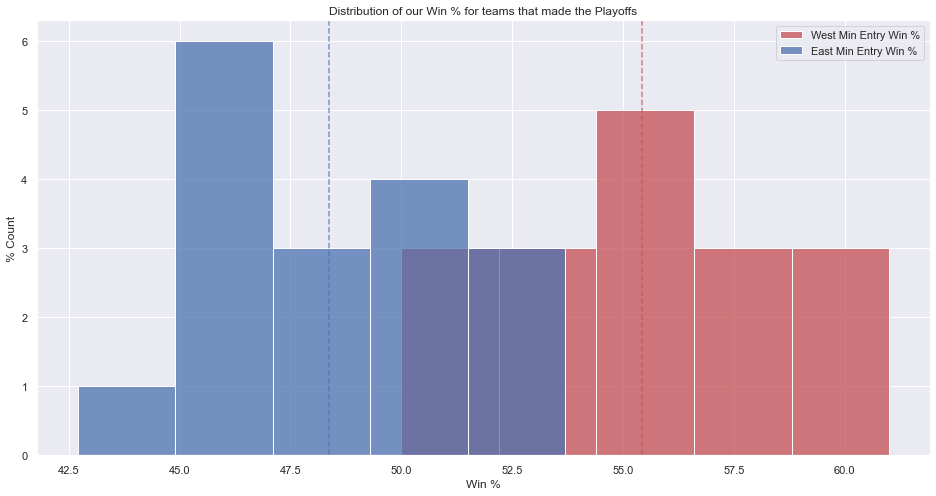

In [93]:
# West as control sample and East as Experimental sample.
test = Test(west_teams_qualifiying, east_teams_qualifiying, 0.05)
test.two_sample_ttest()
test.print_results()
plot_infos = {"title":"Distribution of our Win % for teams that made the Playoffs",
             "label1":"West Min Entry Win %",
             "label2":"East Min Entry Win %",
             "xlabel":"Win %",
             "ylabel":"% Count",
             "bins":5,
             "figsize":[16,8]}
test.plot(plot_infos)

We used a two tailed Student t-test again as the samples were normally distributed and equal sample sizes.

> **Step 5: Comparison**

    The P-Value is geater then Alpha and therefore it shows that there is a statistically significant difference and thus we reject our Null Hypothesis, that there is no statistic significance in ease of making the Playoffs between teams in West vs East.

> **Step6 : Decesion**

      it is very clear that it is much more competitive and harder for teams in the West to make the playoffs as the minimum win % required by them is much higher compared to the East. the Avg score required to be of top 8 teams in west would require you to have at least an Avg win rate of 55%, that means winning more games then losing, while in the east the minimum Avg score to make the Playoffs is 48%, which shows that teams in the East make the Playoffs even though they have lost more games then won.

#### Hypothesis 3:

> **the Null Hypothesis 𝐻0 : There is no significant difference in teams winning who have all stars players(with a DF_SCORE > 40 in their team)**

>  **Alternate Hypothesis: It is significantly easier for teams to make the Playoffs in the East Vs the West**

> **Step 3 : Significance Level, is at 0.025 in this case since its a one tailed t-test. Assuming Null Hypothesis to be true.**

In [94]:
df2_score_sorted = df2.set_index('DF_SCORE')
df2_score_sorted.sort_values('DF_SCORE',ascending=False).head()

,GAME_ID,TEAM_ID,TEAM_CITY,TEAM_ABBREVIATION,MIN,PLAYER_ID,PLAYER_NAME,SEASON,GAME_DATE_EST,HOME_TEAM_ID,HOME_TEAM_WINS,PLAYED_HOME,WIN
DF_SCORE,,,,,,,,,,,,,
101.5000,20500591,1610612747,Los Angeles,LAL,41.9300,977,Kobe Bryant,2005,2006-01-22,1610612747,1,1.0000,1.0000
99.0000,21600504,1610612745,Houston,HOU,42.0800,201935,James Harden,2016,2016-12-31,1610612745,1,1.0000,1.0000
99.0000,21700748,1610612745,Houston,HOU,46.4300,201935,James Harden,2017,2018-01-30,1610612745,1,1.0000,1.0000
97.7500,21700692,1610612740,New Orleans,NOP,51.5000,202326,DeMarcus Cousins,2017,2018-01-22,1610612740,1,1.0000,1.0000
96.5000,21601076,1610612756,Phoenix,PHX,44.9700,1626164,Devin Booker,2016,2017-03-24,1610612738,1,0.0000,0.0000


In [95]:
df2_grouped_season = df2.groupby(['SEASON','TEAM_CITY', 'PLAYER_NAME'])['DF_SCORE'].mean()
df2_grouped_season = df2_grouped_season.reset_index()
df2_grouped_season_2014 = df2_grouped_season[(df2_grouped_season['SEASON'] == 2014) &
                   (df2_grouped_season['DF_SCORE'] >= 40)]
df2_grouped_season_2014.TEAM_CITY.value_counts()
df2_grouped_season_2014

,SEASON,TEAM_CITY,PLAYER_NAME,DF_SCORE
6768,2014,Cleveland,LeBron James,49.5430
6867,2014,Golden State,Stephen Curry,45.2454
6876,2014,Houston,James Harden,48.2115
6913,2014,Los Angeles,Blake Griffin,42.6080
6917,2014,Los Angeles,Chris Paul,43.6213
7053,2014,New Orleans,Anthony Davis,47.3101
7109,2014,Oklahoma City,Kevin Durant,41.6810
7118,2014,Oklahoma City,Russell Westbrook,51.0137
7204,2014,Portland,LaMarcus Aldridge,41.0969
7220,2014,Sacramento,DeMarcus Cousins,48.5195


In [99]:
#making two new lists, one with Teams with All stars and and team with no All stars with corresponding stats
team_allstar_pct = []
team_non_allstar_pct = []
for season in seasons_df:
    year = int(season.SEASON_ID[0:1])
    allstars = df2_grouped_season[(df2_grouped_season['SEASON'] == year) & (df2_grouped_season['DF_SCORE'] > 40)]
    team_list = season.TEAM.unique()
    team_allstars_list = allstars.TEAM_CITY.value_counts().index
    for team in team_list:
        team_pct = float(season[(season['TEAM'] == team)]['W_PCT']*100)
        if team in team_allstars_list:
            team_allstar_pct.append(team_pct)
        else:
            team_non_allstar_pct.append(team_pct)

In [100]:
team_allstar_pct = np.array(team_allstar_pct)


team_non_allstar_pct = np.array(team_non_allstar_pct)

Welch's T-test
---------------------------------------------------------------
Obs Number: Sample_1 = 179   Sample_2 = 329
---------------------------------------------------------------
Control Group Avg: 56.25  
 Standard Deviation of the Control Group: 14.17
Control Group Avg: 46.6  
 Standard Deviation of the Experimental Group: 14.5

Mean Differance: 9.649
---------------------------------------------------------------
Degrees of Freedom: 373
---------------------------------------------------------------
t-stat: 7.254803771546899 
t-crit: 1.964663311191155
---------------------------------------------------------------
P-value: 2.351581272423339e-12 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
Cohen's d: 0.6707435996730879
As it is greater then 0.5 this would indicate there is between a medium to large difference in mean between both samples

---------------------------------------------------------------
|t_stat| > t_crit: True
P_value > 

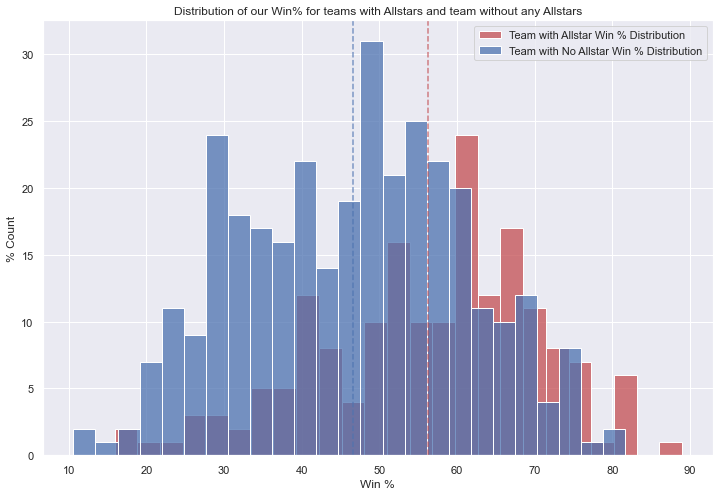

In [101]:
test = Test(team_allstar_pct, team_non_allstar_pct, 0.05)
test.welch()
test.print_results()
plot_infos = {"title":"Distribution of our Win% for teams with Allstars and team without any Allstars",
             "label1":"Team with Allstar Win % Distribution",
             "label2":"Team with No Allstar Win % Distribution",
             "xlabel":"Win %",
             "ylabel":"% Count",
             "bins":25,
             "figsize":[12,8]}
test.plot(plot_infos)

> **Step 5: Comparison**

     The P-Value is greater then Alpha and therefore it shows that there is a statistically significant difference  and thus we reject our Null Hypothesis, we tested the 2 samples we used a Welch's T-test and our p-value was less then our Alpha(0.025 in this case since its a one tailed t-test) 

> **Step6 : Conclusion :**

     There is a significant difference in teams Win % when they have 1 or more Allstars in their team vs team with no Allstars

## Exercise 3

**Continue with the sports theme dataset you like and select three attributes from the dataset. Calculate the p-value and say if you reject the null hypothesis by taking a 5% alpha.**

 For this part we will check if there is a significant variation in Height depende in 3 position

In [102]:
players_df.dropna(axis='rows', inplace=True)
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4213 non-null   object 
 1   year_start  4213 non-null   int64  
 2   year_end    4213 non-null   int64  
 3   position    4213 non-null   object 
 4   height      4213 non-null   object 
 5   weight      4213 non-null   float64
 6   birth_date  4213 non-null   object 
 7   college     4213 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 296.2+ KB


In [103]:
players_df['position'].value_counts()

G      1501
F      1202
C       406
F-C     360
G-F     336
F-G     205
C-F     203
Name: position, dtype: int64

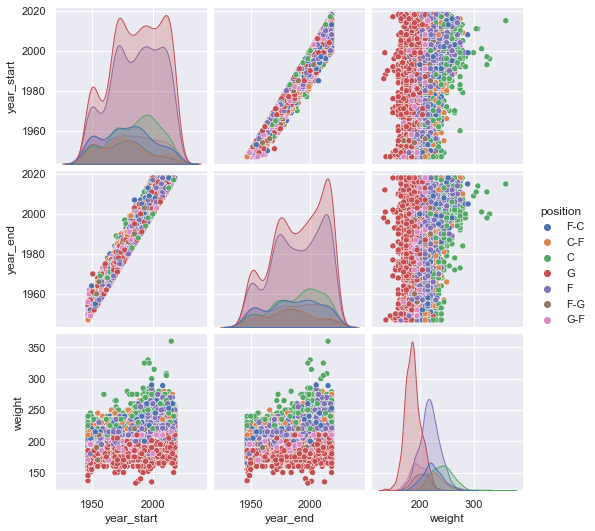

In [104]:
sns.pairplot(players_df, hue='position')

KeyError: 'position'

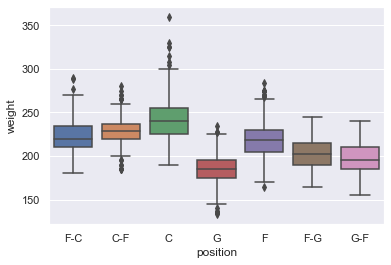

In [105]:
%matplotlib inline





ax = sns.boxplot(x='position', y='weight', data = players_df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['position'])['weight'].median().values
nobs = df['position'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-small',
            color='w',
            weight='semibold')
 
plt.show()

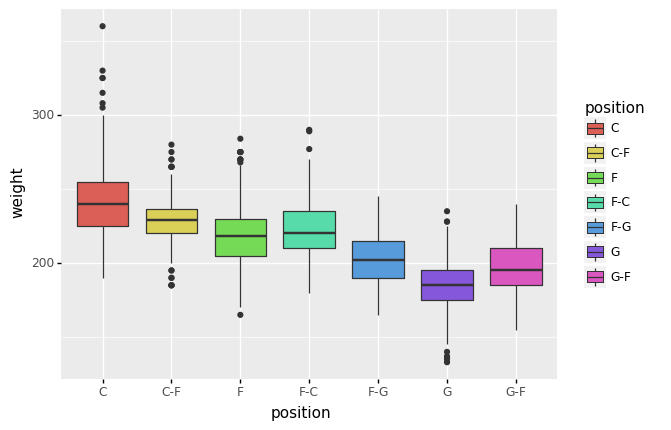

In [106]:
print(p9.ggplot(players_df)+ p9.aes(x='position',y='weight', fill='position')+ p9.geom_boxplot())

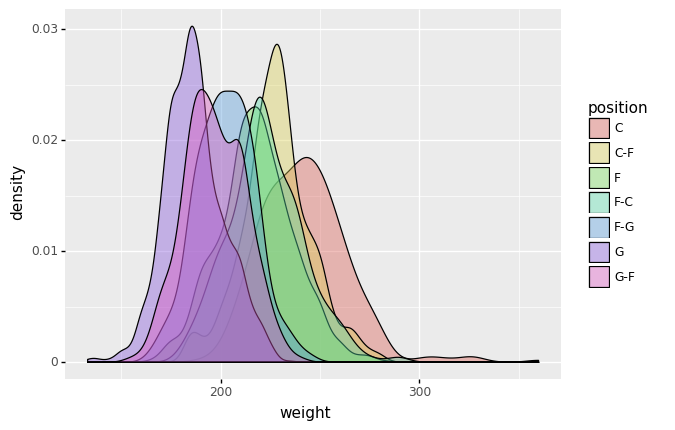

In [107]:
print(p9.ggplot(players_df)+ p9.aes(x='weight', fill='position') + p9.geom_density(alpha=0.4))

> **the Null Hypothesis 𝐻0 :: There is no significant relation between Weight player and his position**

 > **Step 2 : Alternate Hypothesis: There is a significant realation between a player and his weight**

> **Step 3 : Significance Level,  is at 0.05. Assuming Null Hypothesis to be true.**

In [108]:
weight_c = players_df[players_df.position == 'C'].weight
weight_g = players_df[players_df.position == 'G'].weight
weight_f = players_df[players_df.position == 'F'].weight

print(len(weight_c))
print(len(weight_g))
print(len(weight_f))


406
1501
1202


In [109]:
# Shapiro-Wilk Normality Test

stat, p = stats.shapiro(weight_c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Gaussian distrubution')
else:
        print('Not Gaussian')

stat=0.951, p=0.000
Not Gaussian


In [110]:
# Shapiro-Wilk Normality Test

stat, p = stats.shapiro(weight_g)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Gaussian distrubution')
else:
        print('Not Gaussian')

stat=0.985, p=0.000
Not Gaussian


In [111]:
# Shapiro-Wilk Normality Test

stat, p = stats.shapiro(weight_f)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
        print('Gaussian distrubution')
else:
        print('Not Gaussian')

stat=0.993, p=0.000
Not Gaussian


In [112]:
# Perform The Kruskal-Wallis -test 
kustal = stats.kruskal(weight_c,weight_g,weight_f)
print(kustal)

KruskalResult(statistic=1829.2421490457161, pvalue=0.0)


> **Step 5: Comparison**

     In this example, the test statistic comes out to be equal to 1829.24 and the corresponding P-value is null, as the p value it's less than 0.05, we will reject the null hypothesis.

> **Step6 : Decesion**

      There is a relation between the players position and his weight,and if we really know the Basketball,you know always that each position needs heavy players in the defense and more small forward to play offense.

# Sprint 8: Correlation, Feature Scaling & Feature Engineering

## Exercise 1:

**Grab a sports-themed dataset you like and normalize categorical attributes in dummy. Standardize numeric attributes with StandardScaler.**

For this sprint , we will keep working with the same datasets from the NBA.

**Let's explore more attributes in the data set, by plotting and summary statistics**

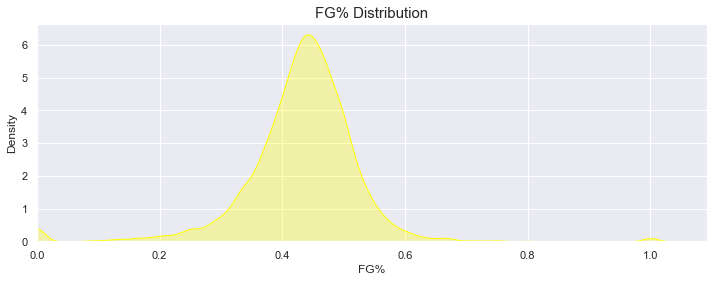

In [115]:
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(nba_df['FG%'], shade=True, color='yellow', alpha=0.3)
ax.set_title('FG% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

In [116]:
# 2P% descriptive stats since 1979-1980 NBA Season (at least one 2PA) 
two_points_percentage = nba_df[( nba_df['Year'] >= 1980.0) & (nba_df['2P%'] > 0)]
two_points_percentage.describe()['2P%']

count   18,547.0000
mean         0.4637
std          0.0845
min          0.0560
25%          0.4260
50%          0.4680
75%          0.5030
max          1.0000
Name: 2P%, dtype: float64

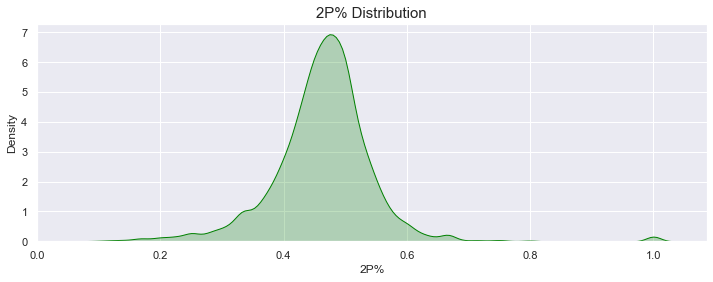

In [117]:
# 2P% distribution, 
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(two_points_percentage['2P%'], shade=True, color='green')
ax.set_title('2P% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

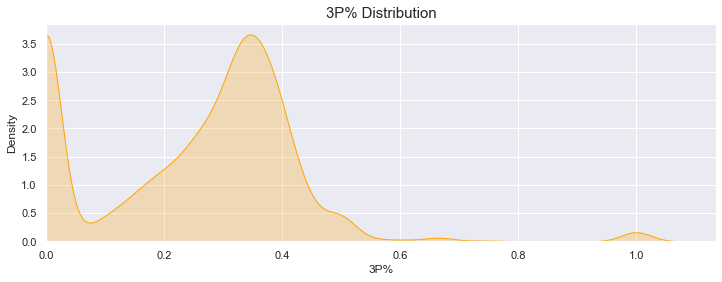

In [118]:
# 3P% distribution. Values under 0.10 should be normalize to dismiss players with insignificant amount of 3PA.
fig, ax = plt.subplots(figsize=(12,4))
ax = sns.kdeplot(nba_df['3P%'], shade=True, color='orange')
ax.set_title('3P% Distribution')
ax.title.set_size(15)
plt.xlim(0,);

In [119]:
# FG% mean by season
field_goals_percentage = nba_df.groupby(['Year']).mean()['FG%']
field_goals_percentage.sample(5)

Year
2,000.0000   0.4274
2,015.0000   0.4274
1,998.0000   0.4292
2,013.0000   0.4265
1,966.0000   0.4099
Name: FG%, dtype: float64

In [120]:
field_goals_percentage.shape


(68,)

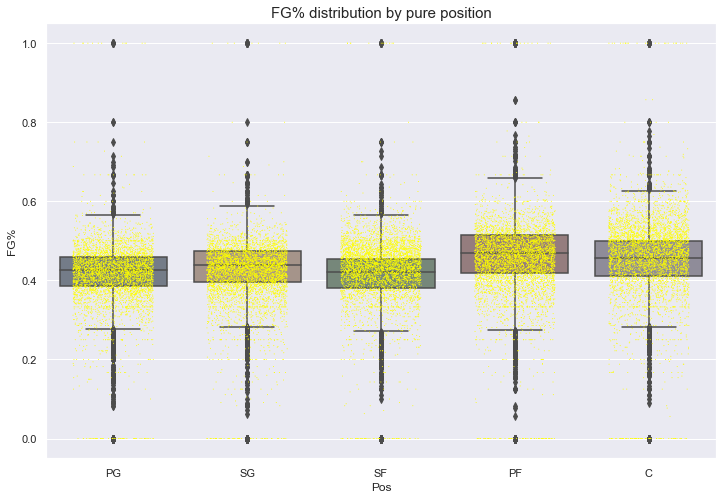

In [121]:
# FG% by pure positions. By 'pure' I mean only 1 position on the floor, according to dataset
# Outliers at 0.0 or 1.0 should be dismissed, presumably considering players with a inisgnificant amount of FGA.
# NBA positions: PG:pont guard - SG:Shooting guard - SF: small forward - PF : power forward - C : center
pure_positions = nba_df[(nba_df.Pos.isin(['PG','SG','SF','PF','C']))]
fg_per_pure_positions = pure_positions['FG%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=fg_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=fg_per_pure_positions, color="Yellow", jitter=0.3, size=1.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('FG% distribution by pure position')
ax.title.set_size(15);

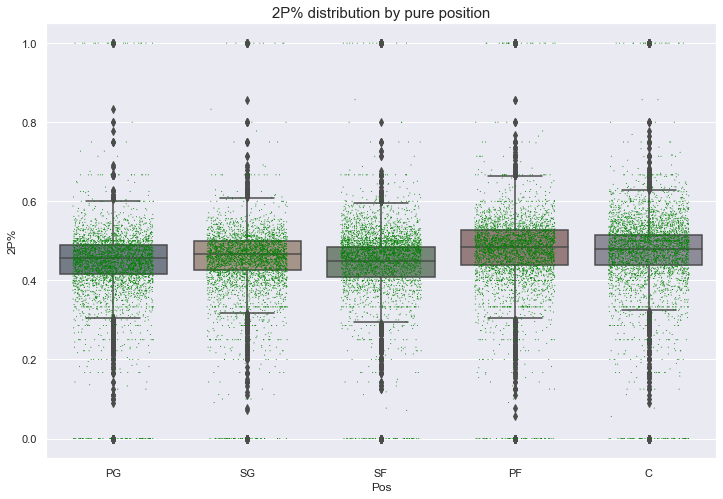

In [122]:
# 2P% by 'pure' positions
twopoints_per_pure_positions = pure_positions[(pure_positions['2PA'] > 0) & (pure_positions['Year'] >= 1980.0)]['2P%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=twopoints_per_pure_positions, color="green", jitter=0.3, size=1.0, order=['PG', 'SG','SF','PF','C'])
ax.set_title('2P% distribution by pure position')
ax.title.set_size(15);

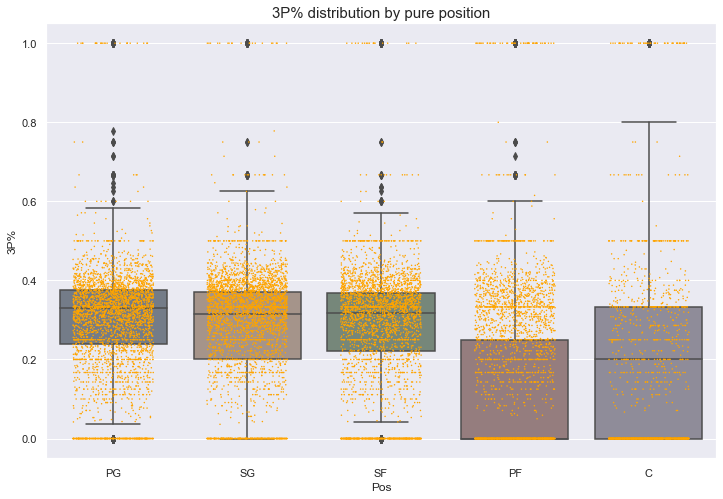

In [123]:
# 3P% by 'pure' positions
threepoints_per_pure_positions = pure_positions[(pure_positions['3PA'] > 0) & (pure_positions['Year'] >= 1980.0)]['3P%']
ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x=pure_positions.Pos, y=threepoints_per_pure_positions, saturation=0.2)
ax = sns.stripplot(x=pure_positions.Pos, y=threepoints_per_pure_positions, color="orange", jitter=0.3, size=1.5, order=['PG', 'SG','SF','PF','C'])
ax.set_title('3P% distribution by pure position')
ax.title.set_size(15);

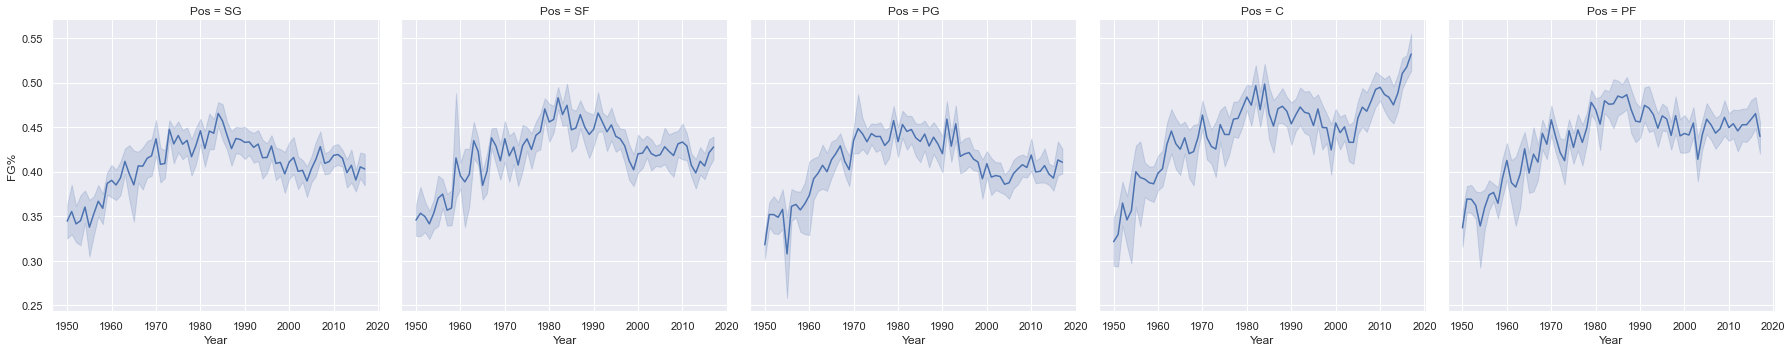

In [124]:
# Time series for FG%, by 'pure' positions

ax = sns.relplot(x=pure_positions.Year, y=pure_positions['FG%'], col=pure_positions.Pos, kind='line', col_wrap=5);

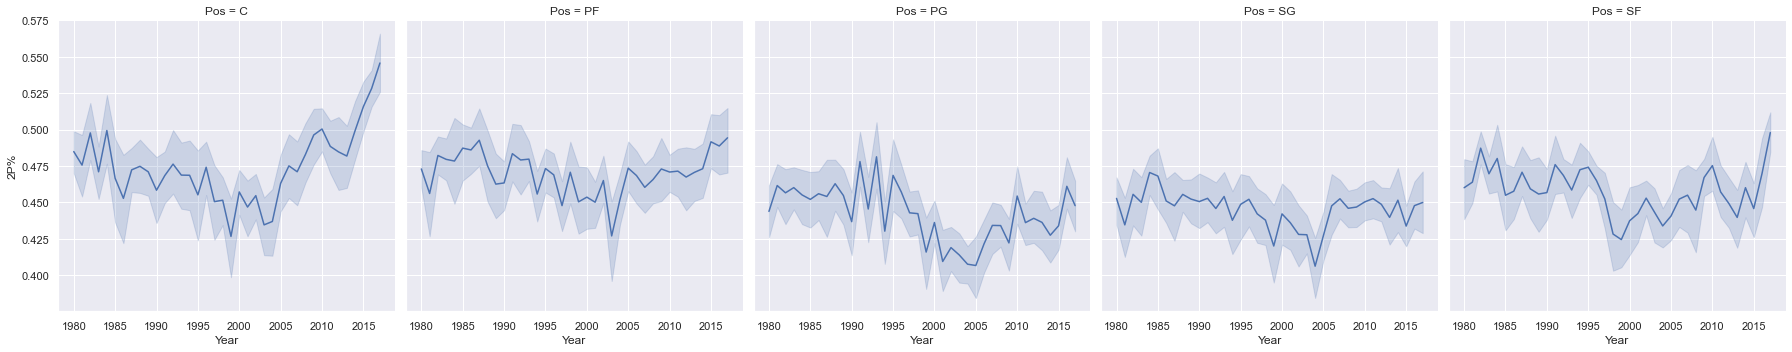

In [125]:
# Time series for 2P%, by 'pure' positions
pure_positions = pure_positions[(pure_positions['Year'] >= 1980.0) & (pure_positions['2PA'] > 0.0)]
sns.relplot(x=pure_positions.Year, y=pure_positions['2P%'], col=pure_positions.Pos, kind='line', col_wrap=5);

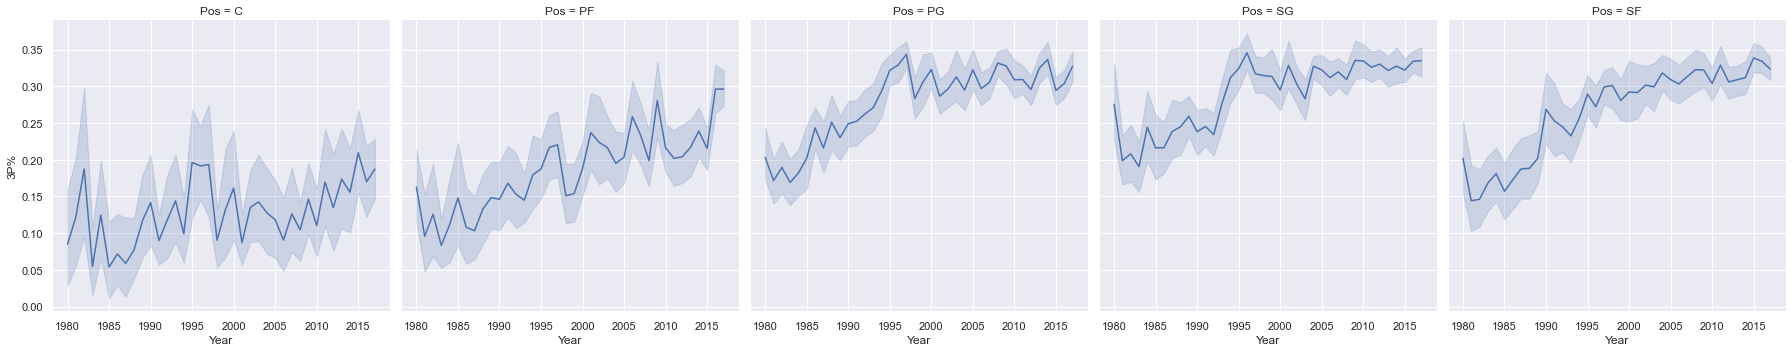

In [126]:
# Time series for 3P%, by 'pure' positions
pure_positions = pure_positions[(pure_positions['Year'] >= 1980.0) & (pure_positions['3PA'] > 0.0)]
sns.relplot(x=pure_positions.Year, y=pure_positions['3P%'], col=pure_positions.Pos, kind='line', col_wrap=5);

### List Of Techniques

**1. Imputation**

**1.1 Treshold imputation**

    The most simple solution to the missing values is to drop the rows or the entire column.There is not an optimum threshold for dropping but we will use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.

In [127]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data_treshhold = nba_df[nba_df.columns[nba_df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data_treshhold = nba_df.loc[nba_df.isnull().mean(axis=1) < threshold]

In [128]:
data_treshhold.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,"24,624.0000","24,616.0000","24,624.0000","18,233.0000","24,138.0000","24,101.0000","24,538.0000","18,839.0000","24,525.0000","20,792.0000",...,"23,766.0000","20,797.0000","20,797.0000","24,312.0000","24,624.0000","20,797.0000","20,797.0000","19,645.0000","24,624.0000","24,624.0000"
mean,"1,992.5950",26.6644,50.8371,23.5934,"1,209.7203",12.4791,0.4930,0.1586,0.3255,6.1816,...,0.7193,62.1892,147.1994,224.6374,114.8526,39.8971,24.4703,73.9398,116.3392,510.1163
std,17.4296,3.8419,26.4962,28.6324,941.1466,6.0390,0.0945,0.1875,0.2190,4.8727,...,0.1418,67.3249,145.9219,228.1902,135.8639,38.7131,36.9351,67.7138,84.7919,492.9230
min,"1,950.0000",18.0000,1.0000,0.0000,0.0000,-90.6000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"1,981.0000",24.0000,27.0000,0.0000,340.0000,9.8000,0.4580,0.0050,0.2080,2.6000,...,0.6570,12.0000,33.0000,51.0000,19.0000,9.0000,3.0000,18.0000,39.0000,106.0000
50%,"1,996.0000",26.0000,58.0000,8.0000,"1,053.0000",12.7000,0.5060,0.0640,0.2960,5.4000,...,0.7430,38.0000,106.0000,159.0000,68.0000,29.0000,11.0000,55.0000,109.0000,364.0000
75%,"2,007.0000",29.0000,75.0000,45.0000,"1,971.0000",15.6000,0.5440,0.2880,0.4000,9.0000,...,0.8080,91.0000,212.0000,322.0000,160.0000,60.0000,29.0000,112.0000,182.0000,778.0000
max,"2,017.0000",44.0000,88.0000,83.0000,"3,882.0000",129.1000,1.1360,1.0000,6.0000,100.0000,...,1.0000,587.0000,"1,111.0000","2,149.0000","1,164.0000",301.0000,456.0000,464.0000,386.0000,"4,029.0000"


**1.2 Numerical Imputation**

We another section from a past sprint we used the Numerical impuattion method , as filling all missing with a value as 0 or the medians of the columns .

**#Filling all missing values with 0**\
data = data.fillna(0)

**#Filling missing values with medians of the columns**\
data = data.fillna(data.median())

**1.3 Categorical Imputation**

Replacing the missing values with the maximum occurred value in a column is a good option for handling categorical columns. 

In [129]:
#Max fill function for categorical columns
nba_df_maxfill =nba_df['Pos'].fillna(nba_df['Pos'].value_counts()
.idxmax(), inplace=True)

**2. Handeling Outliers**

**2.1 Outlier Detection with Standard Deviation**

If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?

There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.

In [130]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = nba_df['PTS'].mean () + nba_df['PTS'].std () * factor
lower_lim = nba_df['PTS'].mean () - nba_df['PTS'].std () * factor

nba_df = nba_df[(nba_df['PTS'] < upper_lim) & (nba_df['PTS'] > lower_lim)]

In addition, z-score can be used instead of the formula above. Z-score (or standard score) standardizes the distance between a value and the mean using the standard deviation.

**2.2 Outlier detection with Percentiles**

Another mathematical method to detect outliers is to use percentiles. it's to  assume a certain percent of the value from the top or the bottom as an outlier. The key point is here to set the percentage value once again, and this depends on the distribution of data set  data as mentioned earlier.

In [132]:
#Dropping the outlier rows with Percentiles
upper_lim = nba_df['FG%'].quantile(.95)
lower_lim = nba_df['FG%'].quantile(.05)

nba_df = nba_df[(nba_df['FG%'] < upper_lim) & (nba_df['FG%'] > lower_lim)]

**An Outlier Dilemma: Drop or Cap**

Another option for handling outliers is to cap them instead of dropping. So we can keep our data size and at the end of the day, but capping can affect the distribution of the data, thus it better not to exaggerate it.

**3. Binning**

In [133]:
# Numerical binning Example

nba_df['bin'] = pd.cut(nba_df['BLK'], bins=[0,150,300,450], labels=["Low", "Mid", "High"])

In [134]:
nba_df_pos = nba_df['Pos'].value_counts(normalize=True, dropna= False)
nba_df_pos

SG      0.2101
PG      0.2042
SF      0.2010
PF      0.1964
C       0.1677
F       0.0026
G       0.0021
G-F     0.0021
F-C     0.0018
SF-SG   0.0015
C-PF    0.0015
PG-SG   0.0013
SG-PG   0.0012
SG-SF   0.0012
PF-SF   0.0011
PF-C    0.0011
SF-PF   0.0010
C-F     0.0009
F-G     0.0008
SG-PF   0.0002
C-SF    0.0001
SF-PG   0.0001
PG-SF   0.0001
Name: Pos, dtype: float64

In [135]:
#Categorical Binning

conditions = [
    nba_df['Pos'].str.contains('SG'),
    nba_df['Pos'].str.contains('PF'),
    nba_df['Pos'].str.contains('PG'),
    nba_df['Pos'].str.contains('C'),
    nba_df['Pos'].str.contains('F')]

choices = ['Shooting Guard','Power Forward','Point Guard','Center','Small forward']

nba_df['Pos'] = np.select(conditions, choices, default='Other')

**4. Log Transform** 

Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:

. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.\
. In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.\
. It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

** To apply log transform must have only positives values,otherwise we receive an error. Also, we can add 1 to our data before transform it. Thus, you ensure the output of the transformation to be positive.


In [136]:
#Log Transform Example

nba_df['log+1'] = (nba_df['STL']+1).transform(np.log)
#Negative Values Handling

nba_df['log'] = (nba_df['STL']-nba_df['STL'].min()+1) .transform(np.log)

data_log = nba_df[['STL','log','log+1']]
data_log

,STL,log,log+1
1,NaN,NaN,NaN
2,NaN,NaN,NaN
6,NaN,NaN,NaN
13,NaN,NaN,NaN
14,NaN,NaN,NaN
...,...,...,...
24682,10.0000,2.3979,2.3979
24683,4.0000,1.6094,1.6094
24684,37.0000,3.6376,3.6376
24687,7.0000,2.0794,2.0794


**5. One-hot encoding**

One-hot encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes our categorical data, which is challenging to understand for algorithms, to a numerical format and enables us to group your categorical data without losing any information.

In [137]:
encoded_pos = pd.get_dummies(nba_df['Pos'])
nba_df_encoded_pos = nba_df.join(encoded_pos).drop('Pos',axis=1)
nba_df_encoded_pos

,Year,Player,Age,Tm,G,GS,MP,PER,TS%,3PAr,...,season,bin,log+1,log,Center,Other,Point Guard,Power Forward,Shooting Guard,Small forward
1,"1,950.0000",Cliff Barker,29.0000,INO,49.0000,NaN,NaN,NaN,0.4350,NaN,...,1950,NaN,NaN,NaN,0,0,0,0,1,0
2,"1,950.0000",Leo Barnhorst,25.0000,CHS,67.0000,NaN,NaN,NaN,0.3940,NaN,...,1950,NaN,NaN,NaN,0,0,0,0,0,1
6,"1,950.0000",Ralph Beard,22.0000,INO,60.0000,NaN,NaN,NaN,0.4220,NaN,...,1950,NaN,NaN,NaN,0,1,0,0,0,0
13,"1,950.0000",Vince Boryla,22.0000,NYK,59.0000,NaN,NaN,NaN,0.4260,NaN,...,1950,NaN,NaN,NaN,0,0,0,0,0,1
14,"1,950.0000",Don Boven,24.0000,WAT,62.0000,NaN,NaN,NaN,0.4610,NaN,...,1950,NaN,NaN,NaN,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24682,"2,017.0000",James Young,21.0000,BOS,29.0000,0.0000,220.0000,10.0000,0.5490,0.6030,...,2017,Low,2.3979,2.3979,0,0,0,0,1,0
24683,"2,017.0000",Joe Young,24.0000,IND,33.0000,0.0000,135.0000,11.4000,0.4330,0.3190,...,2017,NaN,1.6094,1.6094,0,0,1,0,0,0
24684,"2,017.0000",Nick Young,31.0000,LAL,60.0000,60.0000,"1,556.0000",14.1000,0.5880,0.6650,...,2017,Low,3.6376,3.6376,0,0,0,0,1,0
24687,"2,017.0000",Tyler Zeller,27.0000,BOS,51.0000,5.0000,525.0000,13.0000,0.5080,0.0060,...,2017,Low,2.0794,2.0794,1,0,0,0,0,0


**6. Grouping Operations**

In [138]:
# FGA by season
field_goals_a = nba_df.groupby(['Year']).sum()['FGA']
field_goals_a.head()

Year
1,950.0000   54,587.0000
1,951.0000   45,673.0000
1,952.0000   44,551.0000
1,953.0000   50,680.0000
1,954.0000   44,691.0000
Name: FGA, dtype: float64

In [139]:
# 2PA by season. Since 1979-1980 NBA Season, players with at least one 2P shot attempted
two_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['2PA'] > 0.0)].groupby(["Year"]).sum()['2PA']
two_points_a.head()

Year
1,980.0000   141,079.0000
1,981.0000   131,610.0000
1,982.0000   131,847.0000
1,983.0000   146,033.0000
1,984.0000   123,084.0000
Name: 2PA, dtype: float64

In [140]:
# 3PA by season. Since 1979-1980 NBA Season, players with at least one 3P shot attempted
three_points_a = nba_df[(nba_df['Year'] >= 1980.0) & (nba_df['3PA'] > 0.0)].groupby(["Year"]).sum()['3PA']
three_points_a.head()

Year
1,980.0000   5,085.0000
1,981.0000   3,676.0000
1,982.0000   4,272.0000
1,983.0000   4,260.0000
1,984.0000   4,072.0000
Name: 3PA, dtype: float64

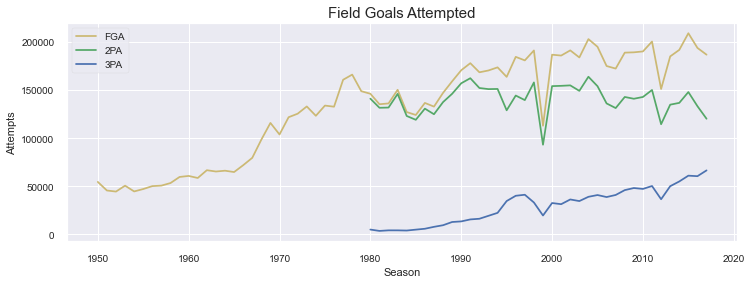

In [141]:
# Although 1999-00 and 2011-12 lock-out seasons dramatically interrupted the course, each series has a trend:
# 2PA is slowly falling down
# On the other side, 3PA is always rising, as well as FGA

mpl.style.use('seaborn-notebook')
fig, ax = plt.subplots(figsize=(12,4))
plt.plot(field_goals_a,data=nba_df,color='y')
plt.plot(two_points_a,data=nba_df,color='g')
plt.plot(three_points_a,data=nba_df,color='b')
plt.legend(loc='upper left')
ax.set_xlabel('Season')
ax.set_ylabel('Attempts')
ax.set_title('Field Goals Attempted')
ax.title.set_size(15);

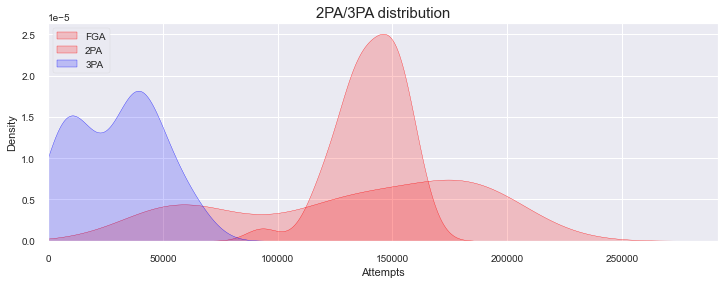

In [142]:
# 2PA/3PA distribution. While 2PA has a clear simmetrycal form, 3PA has a range between 0 and 75000 attempts. 
# This could be related to the way the game is played last years (and compared to 1980-1990s game style)
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.kdeplot(field_goals_a, shade=True, color='red', alpha=0.2, label='FGA')
ax = sns.kdeplot(two_points_a, shade=True, color='red', alpha=0.2, label='2PA')
ax = sns.kdeplot(three_points_a, shade=True, color='blue', alpha=0.2, label='3PA')

ax.set_title('2PA/3PA distribution')
ax.title.set_size(15)
ax.set_xlabel('Attempts')
ax.legend(loc='upper left')
plt.xlim(0,);

In [144]:
field_goals_a.describe()

count        68.0000
mean    133,349.0000
std      52,476.6213
min      44,551.0000
25%      77,691.2500
50%     141,401.0000
75%     181,599.7500
max     209,041.0000
Name: FGA, dtype: float64

In [145]:
# 2PA descriptive stats
two_points_a.describe()

count        38.0000
mean    140,314.4211
std      14,663.6601
min      93,248.0000
25%     131,669.2500
50%     141,957.0000
75%     151,121.5000
max     163,843.0000
Name: 2PA, dtype: float64

In [146]:
# 3PA descriptive stats
three_points_a.describe()

count       38.0000
mean    29,896.5000
std     18,745.8542
min      3,676.0000
25%     13,096.0000
50%     33,942.5000
75%     41,196.2500
max     66,550.0000
Name: 3PA, dtype: float64

**7. Feature Split**

Split function is a good option, however, there is no one way of splitting features. It depends on the characteristics of the column, how to split it. Let’s introduce it with two examples. First, a simple split function for an ordinary name column:

In [148]:
data_pos = nba_df['Pos'].copy

#Extracting the players with different position 

nba_df.Pos.str.split("-").map(lambda x: x[0])

1        Shooting Guard
2         Small forward
6                 Other
13        Small forward
14        Small forward
              ...      
24682    Shooting Guard
24683       Point Guard
24684    Shooting Guard
24687            Center
24689     Small forward
Name: Pos, Length: 19373, dtype: object

**8. Scaling**

     In most cases, the numerical features of the dataset do not have a certain range and they differ from each    other. In real life, it is nonsense to expect age and income columns to have the same range. But from the      machine learning point of view, how these two columns can be compared?

     Scaling solves this problem. The continuous features become identical in terms of the range, after a scaling  process. This process is not mandatory for many algorithms, but it might be still nice to apply. However, the   algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as   model input.

    Basically, there are two common ways of scaling:

   **Normalization** 

     Normalization (or min-max normalization) scale all values in a fixed range between 0 and 1.This transformation does not change the distribution of the feature and due to the decreased standard deviations,the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

In [149]:
nba_df['drb_normalized'] = (nba_df['DRB']-nba_df['DRB'].min())/ (nba_df['DRB'].max()-nba_df['DRB'].min())
nba_df['drb_normalized']

1          NaN
2          NaN
6          NaN
13         NaN
14         NaN
         ...  
24682   0.0180
24683   0.0144
24684   0.1010
24687   0.0730
24689   0.0992
Name: drb_normalized, Length: 19373, dtype: float64

**Standarization**

    Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

    In the following formula of standardization, the mean is shown as μ and the standard deviation is shown as σ.

In [150]:
nba_df['AST_standardized'] = (nba_df['AST']-nba_df['AST'].mean())/ nba_df['AST'].std()

nba_df['AST_standardized'] 

1       -0.1398
2        0.0858
6        0.7623
13      -0.2416
14       0.0639
          ...  
24682   -0.9036
24683   -0.8236
24684   -0.5108
24687   -0.6271
24689   -0.6708
Name: AST_standardized, Length: 19373, dtype: float64

**Now that we know the math behind, let's do it with Sklearn Library**

In [5]:
df1 = pd.read_csv('Datasets/games_details.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561733 entries, 0 to 561732
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            561733 non-null  int64  
 1   TEAM_ID            561733 non-null  int64  
 2   TEAM_ABBREVIATION  561733 non-null  object 
 3   TEAM_CITY          561733 non-null  object 
 4   PLAYER_ID          561733 non-null  int64  
 5   PLAYER_NAME        561733 non-null  object 
 6   START_POSITION     215354 non-null  object 
 7   COMMENT            89924 non-null   object 
 8   MIN                471808 non-null  object 
 9   FGM                471808 non-null  float64
 10  FGA                471808 non-null  float64
 11  FG_PCT             471808 non-null  float64
 12  FG3M               471808 non-null  float64
 13  FG3A               471808 non-null  float64
 14  FG3_PCT            471808 non-null  float64
 15  FTM                471808 non-null  float64
 16  FT

In [10]:
df1.drop(columns=['COMMENT', 'TEAM_ABBREVIATION'], inplace=True)
df1.dropna(axis='rows', inplace=True)

In [32]:
#sns.pairplot(df1)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [14]:
#filter category (exclude ) columns

#cat = [df1.select_dtypes(exclude=["float64"]).columns]
cat = df1[['TEAM_ID', 'TEAM_CITY','START_POSITION']]

#Unorderer (nominal) data

coder = OneHotEncoder(handle_unknown="ignore",drop='if_binary') #drop binary to avoid multicollinarity 
result = coder.fit_transform(cat)
df1_cat = pd.DataFrame.sparse.from_spmatrix(result)
df1_cat.columns = coder.get_feature_names_out()
df1_cat

,TEAM_ID_1610612737,TEAM_ID_1610612738,TEAM_ID_1610612739,TEAM_ID_1610612740,TEAM_ID_1610612741,TEAM_ID_1610612742,TEAM_ID_1610612743,TEAM_ID_1610612744,TEAM_ID_1610612745,TEAM_ID_1610612746,...,TEAM_CITY_Portland,TEAM_CITY_Sacramento,TEAM_CITY_San Antonio,TEAM_CITY_Seattle,TEAM_CITY_Toronto,TEAM_CITY_Utah,TEAM_CITY_Washington,START_POSITION_C,START_POSITION_F,START_POSITION_G
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215349,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
215350,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
215351,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
215352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
#filter numeric attributes
num = df1[df1.select_dtypes(include=["float64"]).columns]

## numirical variables to Standarize    

#list for cols to scale
columns = num.columns
# initialize the scaler
scaler = StandardScaler()
##scale selected data
scaler = scaler.fit_transform(num)
num_standar = pd.DataFrame(scaler,columns=columns)

display(num_standar.describe().round(2))


,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00,215354.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.64,-1.99,-2.43,-0.71,-0.95,-0.78,-0.92,-0.99,-1.38,-0.87,-1.44,-1.48,-1.05,-0.89,-0.62,-1.18,-1.68,-1.66,-4.69
25%,-0.68,-0.74,-0.65,-0.71,-0.95,-0.78,-0.92,-0.99,-1.38,-0.87,-0.75,-0.68,-0.71,-0.89,-0.62,-0.54,-1.00,-0.69,-0.69
50%,-0.04,-0.02,0.00,-0.71,-0.23,-0.78,-0.20,-0.40,0.27,-0.25,-0.07,-0.16,-0.36,0.02,-0.62,0.10,-0.32,-0.09,-0.03
75%,0.60,0.70,0.62,0.78,0.49,0.62,0.52,0.49,1.09,0.37,0.62,0.63,0.34,0.93,0.35,0.74,0.36,0.63,0.71
max,7.34,6.96,2.92,9.73,7.71,2.73,8.44,10.57,1.09,10.26,7.14,6.70,7.64,8.20,11.04,6.53,2.41,8.09,4.14


In [31]:
# We can do it this Way too, and in this time we will use a MinMaxScaler()

column_trans = ColumnTransformer(transformers=
        [('num', MinMaxScaler(), selector(dtype_exclude="object")),
        ('cat', OneHotEncoder(), selector(dtype_include="object"))],
        remainder='drop')



## Exercise 2

**Continue with the sports theme data set you like and perform principal component analysis.**

## Exercise 3

**Continue with the sports theme data set you like and normalize the data taking into account the outliers.**

       Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard   deviation as we see before, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). Standardization can become skewed or biased if the input variable contains  outlier value
       To overcome this,the median and interquartile range can be used when standardizing numerical input variables , generally referred to as robust scaling.


       

**Robust Scaling Data**
     This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). for this case, let's use a quantile range (25, 75) in orden to leaving out the extreme outliers values

In [36]:
#list for cols to normalize
columns = num.columns
# initialize the scaler
Rscaler = RobustScaler(quantile_range=(25, 75))
##scale selected data
scaler = Rscaler.fit_transform(num)
num_Rscaler = pd.DataFrame(scaler,columns=columns)


num_Rscaler.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000
mean,0.031191,0.014380,-0.000305,0.476905,0.159591,0.556051,0.139938,0.267922,-0.109082,0.199948,0.048853,0.119062,0.343631,-0.009034,0.641228,-0.078824,0.232290,0.069372,0.022078
std,0.779138,0.698534,0.785215,0.670628,0.692687,0.712041,0.694232,0.674766,0.405342,0.808911,0.728661,0.758008,0.958831,0.550019,1.029137,0.777407,0.734264,0.755482,0.718979
min,-1.250000,-1.375000,-1.911765,0.000000,-0.500000,0.000000,-0.500000,-0.400000,-0.667000,-0.500000,-1.000000,-1.000000,-0.666667,-0.500000,0.000000,-1.000000,-1.000000,-1.181818,-3.352941
25%,-0.500000,-0.500000,-0.512605,0.000000,-0.500000,0.000000,-0.500000,-0.400000,-0.667000,-0.500000,-0.500000,-0.400000,-0.333333,-0.500000,0.000000,-0.500000,-0.500000,-0.454545,-0.470588
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,0.487395,1.000000,0.500000,1.000000,0.500000,0.600000,0.333000,0.500000,0.500000,0.600000,0.666667,0.500000,1.000000,0.500000,0.500000,0.545455,0.529412
max,5.750000,4.875000,2.289916,7.000000,5.500000,2.500000,6.000000,7.400000,0.333000,8.500000,5.250000,5.200000,7.666667,4.500000,12.000000,5.000000,2.000000,6.181818,3.000000


**Normalizer: The Normalizer rescales the vector for each sample to have unit norm, independently of the distribution of the samples**

In [38]:
#list for cols to normalize
columns = num.columns
# initialize the scaler
Normscaler = Normalizer()
##scale selected data
scaler = Normscaler.fit_transform(num.T)
num_Norscaler = pd.DataFrame(scaler.T,columns=columns)


num_Norscaler.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000
mean,0.001841,0.001925,0.001993,0.001249,0.001486,0.001326,0.001461,0.001516,0.001743,0.001410,0.001770,0.001784,0.001563,0.001435,0.001140,0.001647,0.001851,0.001845,0.000066
std,0.001120,0.000968,0.000819,0.001756,0.001561,0.001698,0.001584,0.001531,0.001267,0.001630,0.001229,0.001208,0.001483,0.001608,0.001829,0.001390,0.001103,0.001114,0.002154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010045
25%,0.001078,0.001212,0.001459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000844,0.000957,0.000516,0.000000,0.000000,0.000894,0.000751,0.001072,-0.001410
50%,0.001796,0.001905,0.001994,0.000000,0.001126,0.000000,0.001141,0.000908,0.002084,0.001007,0.001687,0.001594,0.001031,0.001461,0.000000,0.001788,0.001502,0.001742,0.000000
75%,0.002515,0.002598,0.002502,0.002619,0.002253,0.002385,0.002282,0.002270,0.003125,0.002014,0.002531,0.002551,0.002063,0.002923,0.001777,0.002682,0.002253,0.002547,0.001586
max,0.010059,0.008661,0.004381,0.018330,0.013517,0.005963,0.014835,0.017703,0.003125,0.018130,0.010546,0.009885,0.012892,0.014614,0.021326,0.010726,0.004507,0.010857,0.008987


**QuantileTransformer : applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform or Gaussian distribution. In this case, all the data, including outliers, will be mapped to a uniform distribution with the range [0, 1], making outliers indistinguishable from inliers.**

In [39]:
#list for cols to normalize
columns = num.columns
# initialize the scaler
Qscaler = QuantileTransformer(output_distribution="normal")
##scale selected data
scaler = Qscaler.fit_transform(num)
num_Qscaler = pd.DataFrame(scaler,columns=columns)

num_Qscaler.describe()

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
count,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000,215354.000000
mean,-0.103831,-0.012662,-0.063600,-2.382707,-1.360889,-2.242473,-1.204616,-1.040988,-0.025792,-1.532924,-0.164941,-0.085799,-0.618994,-1.771558,-2.786568,-0.774727,-0.243381,-0.067598,-0.002983
std,1.328228,1.034545,1.461721,3.040094,2.757578,3.301927,2.664709,2.557829,3.998504,2.839164,1.469927,1.287349,2.174334,2.918422,3.028004,2.328812,1.836119,1.225082,0.994238
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.582009,-0.673702,-0.672129,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.687939,-0.595437,-0.621099,-5.199338,-5.199338,-0.400635,-0.897655,-0.601439,-0.665852
50%,0.077862,0.072829,-0.007527,-5.199338,0.006273,-5.199338,0.050204,-0.191865,-0.007527,0.015055,0.113152,0.043924,-0.119468,0.195700,-5.199338,0.251016,-0.241963,0.033880,-0.010037
75%,0.650274,0.724973,0.702315,0.860725,0.571638,0.630254,0.692715,0.670557,5.199338,0.592444,0.726606,0.744694,0.570161,0.928105,0.611996,0.793602,0.357496,0.681594,0.692715
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


**PowerTransformer: applies a power transformation to each feature to make the data more Gaussian-like in order to stabilize variance and minimize skewness, Currently the Yeo-Johnson and Box-Cox transforms are supported and the optimal scaling factor is determined via maximum likelihood estimation in both methods**

**. Yeo-johnson methode**

In [43]:
#list for cols to normalize
columns = num.columns
# initialize the scaler
pt_j_scaler =  PowerTransformer(method="yeo-johnson")
##scale selected data
scaler = pt_j_scaler.fit_transform(num)
num_pt_j_scaler = pd.DataFrame(scaler,columns=columns)

num_pt_j_scaler

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,0.098130,0.261855,-0.201253,1.164361,0.999553,0.982401,0.541170,0.958888,-0.232892,0.122500,0.128372,0.040320,-0.652277,1.080159,-0.791817,0.865486,0.422931,0.282882,0.949000
1,0.402012,-0.278113,1.134183,-0.902746,-1.224580,-0.894532,0.172951,0.524216,-0.232892,1.429843,1.881926,1.956674,0.313797,-1.104175,1.694865,-0.392240,-0.241965,0.168987,1.184932
2,-0.601580,0.088854,-0.973256,-0.902746,-1.224580,-0.894532,-1.289754,-0.591464,-1.339445,1.429843,-1.268839,0.040320,-1.584258,0.386538,-0.791817,-0.392240,1.605122,-0.920248,-0.509025
3,1.434469,1.870168,-0.104904,1.164361,0.999553,0.982401,1.547395,1.292728,1.138962,-1.171742,0.747616,0.305469,0.895214,1.080159,1.694865,-0.392240,-0.241965,1.702904,1.106370
4,-0.233409,-0.680296,0.622054,0.646408,-0.356785,1.712073,0.822679,0.524216,1.138962,-1.171742,0.128372,-0.257871,-0.091378,-1.104175,-0.791817,-0.392240,1.033920,0.051434,1.263419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215349,-1.021556,-0.278113,-1.247218,-0.902746,0.146508,-0.894532,-1.289754,-1.373265,-1.339445,0.750911,-1.268839,-0.601329,-0.091378,1.080159,-0.791817,0.865486,1.605122,-1.278448,1.106370
215350,0.098130,-0.474116,0.910226,-0.902746,-1.224580,-0.894532,0.172951,0.524216,-0.232892,1.147556,1.011515,1.157428,0.895214,0.386538,-0.791817,0.326662,-0.241965,-0.070168,1.576696
215351,-0.601580,-0.680296,-0.137017,-0.902746,-1.224580,-0.894532,0.541170,0.243511,1.138962,2.425267,1.881926,2.928934,1.645324,-1.104175,1.453732,-0.392240,1.033920,-0.464480,0.553783
215352,0.402012,0.590617,-0.137017,1.164361,0.999553,0.982401,0.541170,0.524216,0.421801,-1.171742,-0.698355,-1.011536,-1.584258,1.506474,-0.791817,0.865486,-1.875722,0.500984,1.027728


Ressources :

https://towardsdatascience.com/the-new-kid-on-the-statistics-in-python-block-pingouin-6b353a1db57c 

https://pingouin-stats.org/

https://scikit-posthocs.readthedocs.io/en/latest/tutorial/

https://towardsdatascience.com/into-a-new-way-to-classify-nba-players-using-analytics-44e292526e47

https://digitalcommons.bryant.edu/cgi/viewcontent.cgi?article=1000&context=honors_data_science

https://www.youtube.com/watch?v=8JIe_cz6qGA

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114#3abe

http://vita.had.co.nz/papers/tidy-data.pdf

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html?highlight=scaler